# Online Learning Experiments - Group Project

This notebook contains all experiments for the Online Learning project, organized in a modular and scalable way.

## Table of Contents
1. [Setup and Imports](#setup)
2. [Experiment Configuration Framework](#framework)
3. [Task 1.1: UCB1 Simple Pricing](#task1_1)
4. [Task 1.2: Constrained UCB Pricing](#task1_2)
5. [Task 2.1: Combinatorial UCB Multi-Product](#task2_1)
6. [Task 3.1: Primal-Dual Non-Stationary](#task3_1)
7. [Task 4.1: Multi-Product Primal-Dual](#task4_1)
8. [Task 5.1: Sliding Window Non-Stationarity](#task5_1)

## Setup and Imports

In [1]:
%load_ext autoreload
%autoreload 2

print("Autoreload abilitato - i moduli verranno ricaricati automaticamente quando modificati")

Autoreload abilitato - i moduli verranno ricaricati automaticamente quando modificati


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

from environments import *
from agents import *
from data_generators import *
from utils import *
from runner import *
from plotter import *
from scipy.stats import beta

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

print("Setup completed successfully!")


Experiment framework created successfully!
Plotting and analysis utilities created successfully!
Setup completed successfully!


## <a id="task1_1"></a>Task 1.1: UCB1 Simple Pricing

Implementation of UCB1 for the pricing problem with uniform valuations.

Task 1.1 - UCB1 Simple Pricing
Prices: [0.1 0.2 0.3 0.5 0.7 0.8]

=== Eseguendo esperimento con distribuzione Uniform ===
Running Task 1.1 - UCB1 Simple Pricing (Uniform)
Horizon: 10000, Trials: 3
Trial 1/3... ✓
Trial 2/3... ✓
Trial 3/3... ✓
Esperimento Uniform completato

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 1.1 - UCB1 Simple Pricing (Beta)
Horizon: 10000, Trials: 3
Trial 1/3... ✓
Trial 2/3... ✓
Trial 3/3... ✓
Esperimento Beta completato


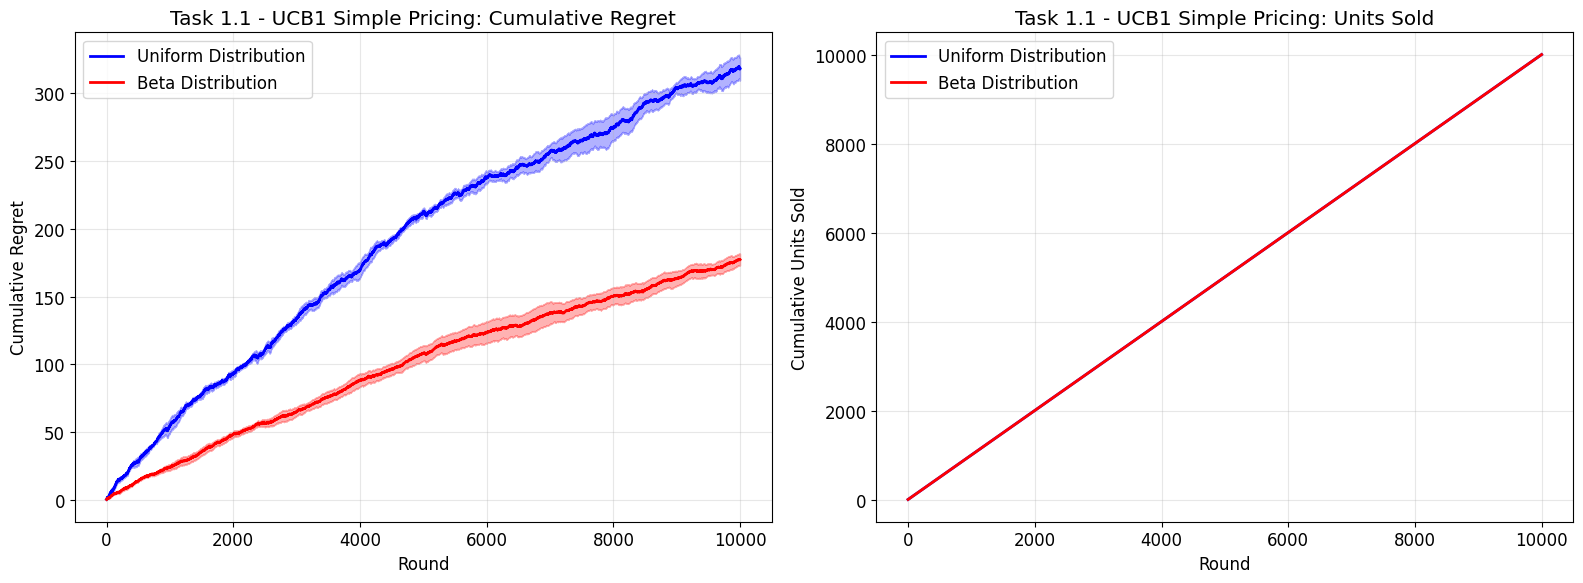


=== ANALISI DETTAGLIATA ===

--- Distribuzione Uniform ---

RESULTS FOR Task 1.1 - UCB1 Simple Pricing (Uniform)
Execution time: 0.31 seconds
Completed rounds: 10000
Average regret per round: 0.031823
Average final reward: 2181.77 ± 14.45
Efficiency vs clairvoyant: 87.3%
Average units sold: 10000.00/1000.0 (1000.0%)
Empirical average rewards: [0.0865 0.1561 0.2087 0.2528 0.2236 0.1621]

--- Distribuzione Beta ---

RESULTS FOR Task 1.1 - UCB1 Simple Pricing (Beta)
Execution time: 0.28 seconds
Completed rounds: 10000
Average regret per round: 0.017729
Average final reward: 604.43 ± 7.38
Efficiency vs clairvoyant: 77.3%
Average units sold: 10000.00/1000.0 (1000.0%)
Empirical average rewards: [0.0522 0.0763 0.0782 0.0623 0.0322 0.0084]

=== CONFRONTO FINALE ===
Uniform: Final Average Regret = 318.2333, Final Average Reward = 2181.7667
Beta: Final Average Regret = 177.2903, Final Average Reward = 604.4333


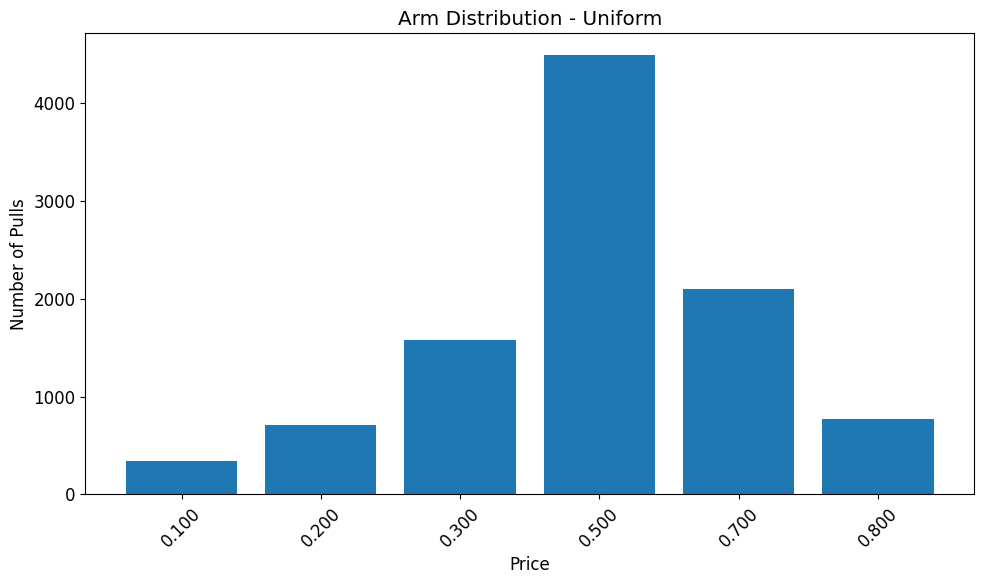

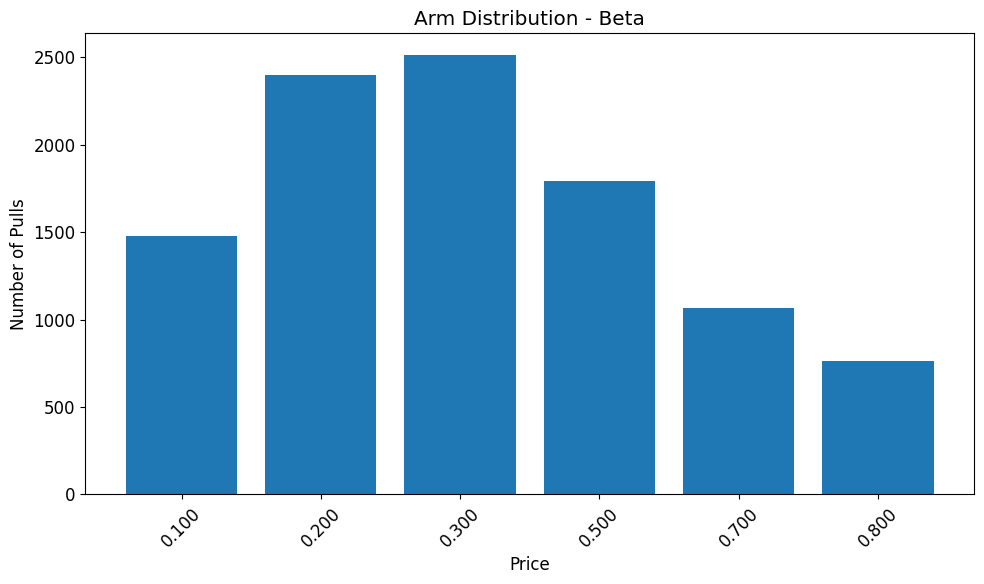

In [3]:
class Task1_1_Runner(StandardExperimentRunner):
    """UCB1 Simple Pricing experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.prices = config.prices
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = PricingEnvironment(
            self.prices, self.config.horizon, rng=rng, distribution=self.distribution)
        return self.env

    def create_agent(self):
        self.agent = UCB1PricingAgent(len(self.prices), self.config.horizon)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        if self.distribution == Distribution.UNIFORM:
            self.probabilities = 1 - self.prices
        elif self.distribution == Distribution.BETA:
            self.probabilities = 1 - beta.cdf(self.prices, 0.5, 2)
        else:
            raise ValueError(f"Distribution {self.distribution} not supported")

        self.expected_revenues = self.prices * self.probabilities
        self.best_idx = np.argmax(self.expected_revenues)
        self.clairvoyant_reward_per_round = self.expected_revenues[self.best_idx]

        return self.clairvoyant_reward_per_round

    def extract_metrics(self, result) -> tuple[float, float]:
        return float(result), 1.0


price_grid = create_simple_prices()
config = ExperimentConfig(
    task_name="Task 1.1 - UCB1 Simple Pricing",
    horizon=10_000,
    n_trials=3,
    seed=18,
    prices=price_grid,
    distribution=[Distribution.UNIFORM, Distribution.BETA],
)

print(f"Task 1.1 - UCB1 Simple Pricing")
print(f"Prices: {price_grid}")

# Esegui gli esperimenti
multi_runner = MultiDistributionRunner(Task1_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=False)

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## <a id="task1_2"></a>Task 1.2: Constrained UCB Pricing

Implementation of Constrained UCB for pricing with budget constraints.


Task 1.2 - Constrained UCB Pricing
Prices: 16 prices from 0.200 to 0.980
Budget: 8000, Horizon: 10000

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 1.2 - Constrained UCB Pricing (Beta)
Horizon: 10000, Trials: 1
Trial 1/1... ✓
Esperimento Beta completato

=== Eseguendo esperimento con distribuzione Uniform ===
Running Task 1.2 - Constrained UCB Pricing (Uniform)
Horizon: 10000, Trials: 1
Trial 1/1... ✓
Esperimento Uniform completato


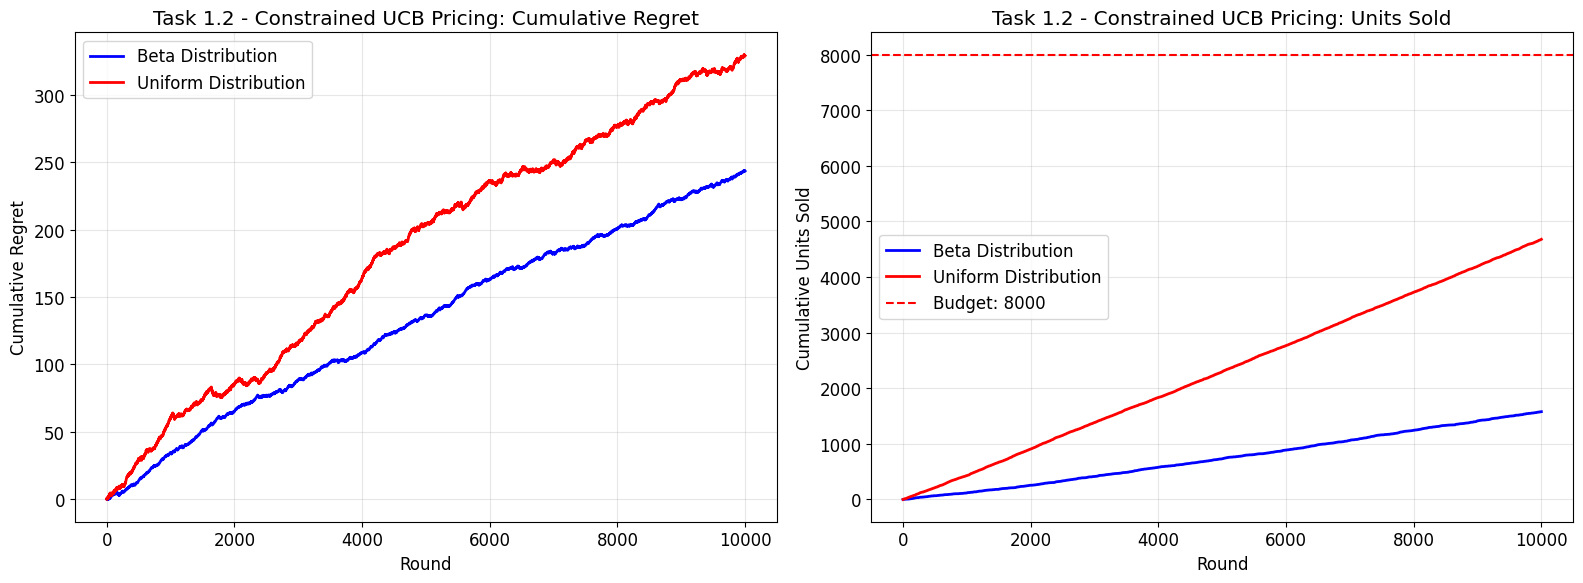


=== ANALISI DETTAGLIATA ===

--- Distribuzione Beta ---

RESULTS FOR Task 1.2 - Constrained UCB Pricing (Beta)
Execution time: 26.46 seconds
Completed rounds: 10000
Average regret per round: 0.024372
Average final reward: 539.17 ± 0.00
Efficiency vs clairvoyant: 68.9%
Average units sold: 1579.00/8000 (19.7%)

--- Distribuzione Uniform ---

RESULTS FOR Task 1.2 - Constrained UCB Pricing (Uniform)
Execution time: 25.31 seconds
Completed rounds: 10000
Average regret per round: 0.032920
Average final reward: 2165.96 ± 0.00
Efficiency vs clairvoyant: 86.8%
Average units sold: 4678.00/8000 (58.5%)

=== CONFRONTO FINALE ===
Beta: Final Average Regret = 243.7180, Final Average Reward = 539.1730
Uniform: Final Average Regret = 329.1960, Final Average Reward = 2165.9640


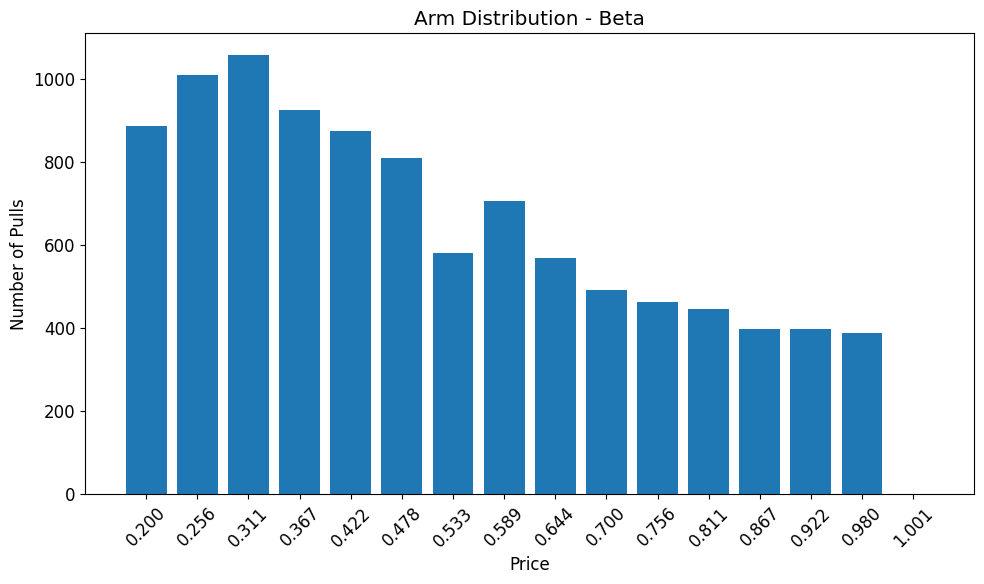

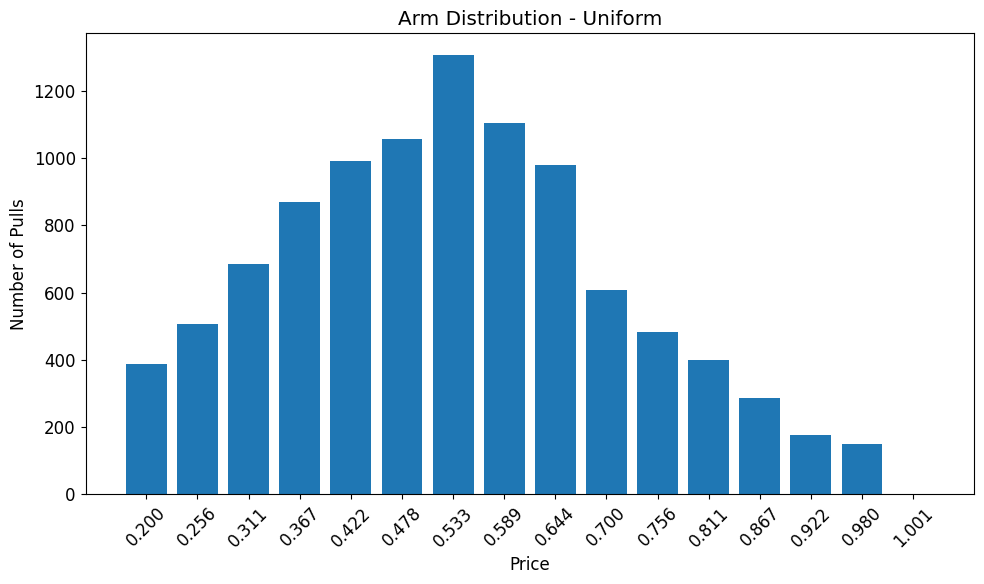

In [4]:
class Task1_2_Runner(StandardExperimentRunner):
    """Constrained UCB Pricing experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.prices = config.prices
        self.distribution = config.distribution
        self.adaptive_rho = config.adaptive_rho

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = BudgetedPricingEnvironment(
            self.prices, self.config.horizon, rng=rng, distribution=self.distribution)
        return self.env

    def create_agent(self):
        self.agent = ConstrainedUCBPricingAgent(
            len(self.prices), self.config.budget, self.config.horizon, alpha=2, adaptive_rho=self.adaptive_rho)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        if self.distribution == Distribution.UNIFORM:
            self.sell_probabilities = np.maximum(0, 1 - self.prices)
        elif self.distribution == Distribution.BETA:
            self.sell_probabilities = 1 - beta.cdf(self.prices, 0.5, 2)
        else:
            raise ValueError(f"Distribution {self.distribution} not supported")

        self.expected_reward = self.prices * self.sell_probabilities
        self.exp_util, self.gamma, self.exp_cost = compute_clairvoyant_single_product(
            self.prices, self.sell_probabilities, self.config.budget, self.config.horizon
        )

        return self.exp_util

    def extract_metrics(self, result) -> tuple[float, float]:
        return float(result[0]), float(result[1])


price_grid = create_default_prices()
config = ExperimentConfig(
    task_name="Task 1.2 - Constrained UCB Pricing",
    horizon=10_000,
    n_trials=1,
    seed=18,
    budget=8_000,
    prices=price_grid,
    distribution=[Distribution.BETA, Distribution.UNIFORM],
    adaptive_rho=False
)

print("Task 1.2 - Constrained UCB Pricing")
print(
    f"Prices: {len(price_grid)} prices from {price_grid[0]:.3f} to {price_grid[-2]:.3f}")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")

multi_runner = MultiDistributionRunner(Task1_2_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True)

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## <a id="task2_1"></a>Task 2.1: Combinatorial UCB Multi-Product

Implementation of Constrained Combinatorial UCB for multi-product pricing with shared budget.


Task 2.1 - Combinatorial UCB Multi-Product
Products: 3, Prices per product: 10
Budget: 7000, Horizon: 10000

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 2.1 - Combinatorial UCB Multi-Product (Beta)
Horizon: 10000, Trials: 1
Trial 1/1... Expected cost: 0.6906
Trial 1: Agent stopped at round 9443. ✓
Expected cost: 0.6906
Esperimento Beta completato

=== Eseguendo esperimento con distribuzione Uniform ===
Running Task 2.1 - Combinatorial UCB Multi-Product (Uniform)
Horizon: 10000, Trials: 1
Trial 1/1... Expected cost: 0.7000
Trial 1: Agent stopped at round 5412. ✓
Expected cost: 0.7000
Esperimento Uniform completato


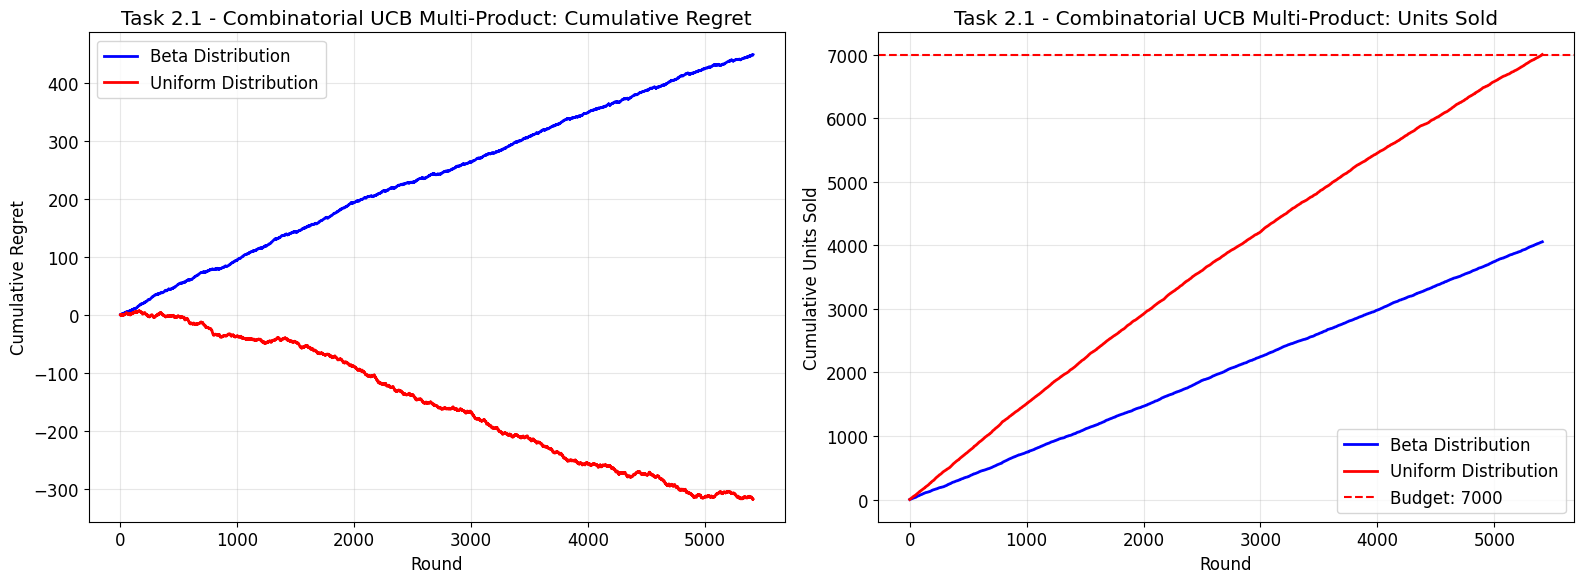


=== ANALISI DETTAGLIATA ===

--- Distribuzione Beta ---

RESULTS FOR Task 2.1 - Combinatorial UCB Multi-Product (Beta)
Execution time: 28.33 seconds
Completed rounds: 9443
Average regret per round: 0.078212
Average final reward: 1435.22 ± 0.00
Efficiency vs clairvoyant: 66.0%
Average units sold: 7000.00/7000 (100.0%)

--- Distribuzione Uniform ---

RESULTS FOR Task 2.1 - Combinatorial UCB Multi-Product (Uniform)
Execution time: 15.34 seconds
Completed rounds: 5412
Average regret per round: -0.058684
Average final reward: 3204.00 ± 0.00
Efficiency vs clairvoyant: 111.0%
Average units sold: 7000.00/7000 (100.0%)

=== CONFRONTO FINALE ===
Beta: Final Average Regret = 738.5530, Final Average Reward = 1435.2222
Uniform: Final Average Regret = -317.6000, Final Average Reward = 3204.0000


<Figure size 1000x600 with 0 Axes>

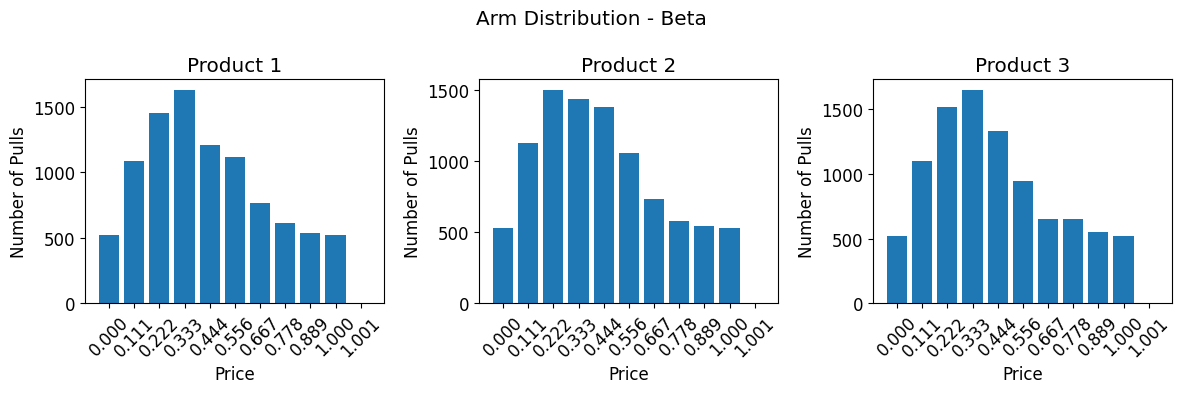

<Figure size 1000x600 with 0 Axes>

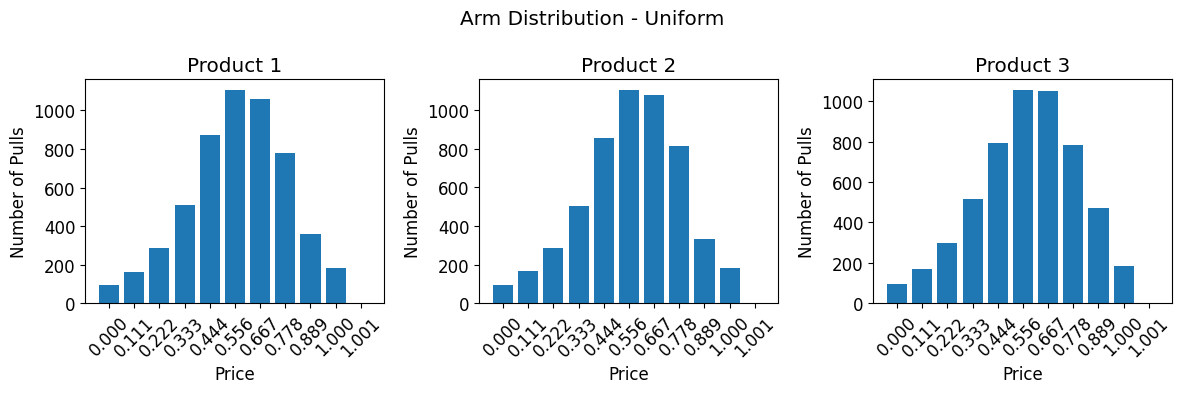

In [5]:
class Task2_1_Runner(StandardExperimentRunner):
    """Combinatorial UCB Multi-Product experiment runner"""
    
    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.n_products = config.n_products
        self.distribution = config.distribution
        self.price_grid = [np.concatenate([config.prices, [1.001]]) for _ in range(self.n_products)]
        
    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = MultiProductPricingEnvironment(self.price_grid, self.config.horizon, rng=rng, distribution=self.distribution)
        return self.env
        
    def create_agent(self):
        self.agent = ConstrainedCombinatorialUCBAgent(self.price_grid, self.config.budget, self.config.horizon, alpha=2)
        return self.agent
        
    def compute_clairvoyant_reward(self) -> float:
        if self.distribution == Distribution.UNIFORM:
            f_true = [prices * np.maximum(0, (1 - prices)) for prices in self.price_grid]
            c_true = [np.maximum(0, 1 - prices) for prices in self.price_grid]
        elif self.distribution == Distribution.BETA:
            f_true = [prices * (1 - beta.cdf(prices, 0.5, 2)) for prices in self.price_grid]
            c_true = [1 - beta.cdf(prices, 0.5, 2) for prices in self.price_grid]
        else:
            raise ValueError(f"Distribution {self.distribution} not supported")

        self.clair_reward, self.simplex = solve_clairvoyant_lp(self.price_grid, self.config.budget, self.config.horizon, f_true, c_true)

        return self.clair_reward
        
    def extract_metrics(self, result) -> tuple[float, float]:
        rewards, costs = result
        return float(np.sum(rewards)), float(np.sum(costs))

n_products = 3
price_grid = np.linspace(0, 1, 10)

config = ExperimentConfig(
    task_name="Task 2.1 - Combinatorial UCB Multi-Product",
    horizon=10_000,
    n_trials=1,
    seed=18,
    budget=7_000,
    prices=price_grid,
    n_products=n_products,
    distribution=[Distribution.BETA, Distribution.UNIFORM]
)

print(f"Task 2.1 - Combinatorial UCB Multi-Product")
print(f"Products: {n_products}, Prices per product: {len(price_grid)}")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")

multi_runner = MultiDistributionRunner(Task2_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## <a id="task3_1"></a>Task 3.1: Primal-Dual Non-Stationary Pricing

Implementation of Full-Feedback Primal-Dual for non-stationary environments with adversarial shocks.


Task 3.1 - Primal-Dual Non-Stationary Pricing
Budget: 6000, Horizon: 10000
Shock probability: 0.5, Frequency: 300
Prices: 16 from 0.200 to 0.980

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 3.1 - Primal-Dual Non-Stationary Pricing (Beta)
Horizon: 10000, Trials: 1
Trial 1/1... ✓
Esperimento Beta completato

=== Eseguendo esperimento con distribuzione Sinusoidal ===
Running Task 3.1 - Primal-Dual Non-Stationary Pricing (Sinusoidal)
Horizon: 10000, Trials: 1
Trial 1/1... ✓
Esperimento Sinusoidal completato

=== Eseguendo esperimento con distribuzione Piecewise Beta ===
Running Task 3.1 - Primal-Dual Non-Stationary Pricing (Piecewise Beta)
Horizon: 10000, Trials: 1
Trial 1/1... ✓
Esperimento Piecewise Beta completato


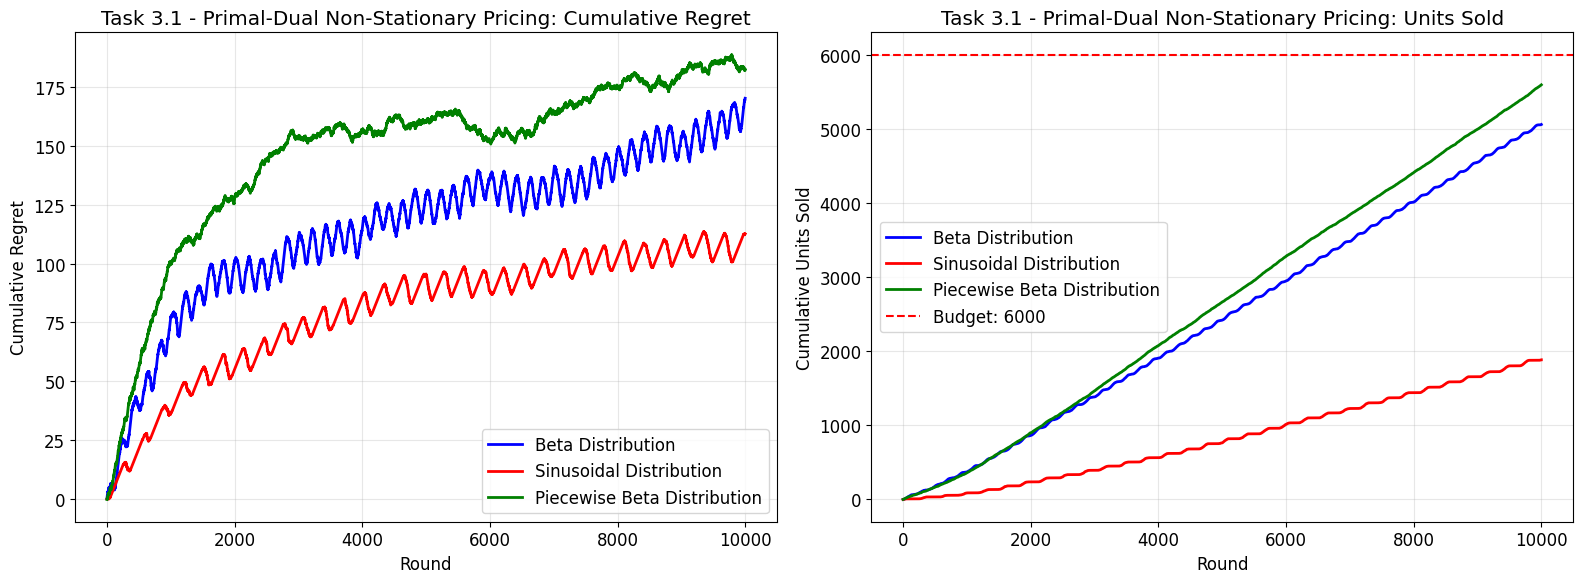


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Beta:


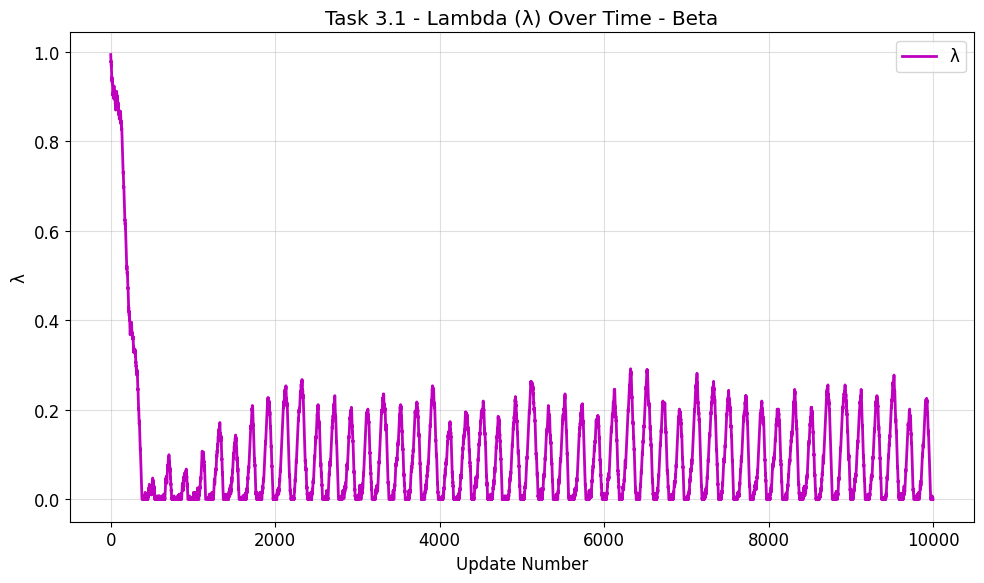

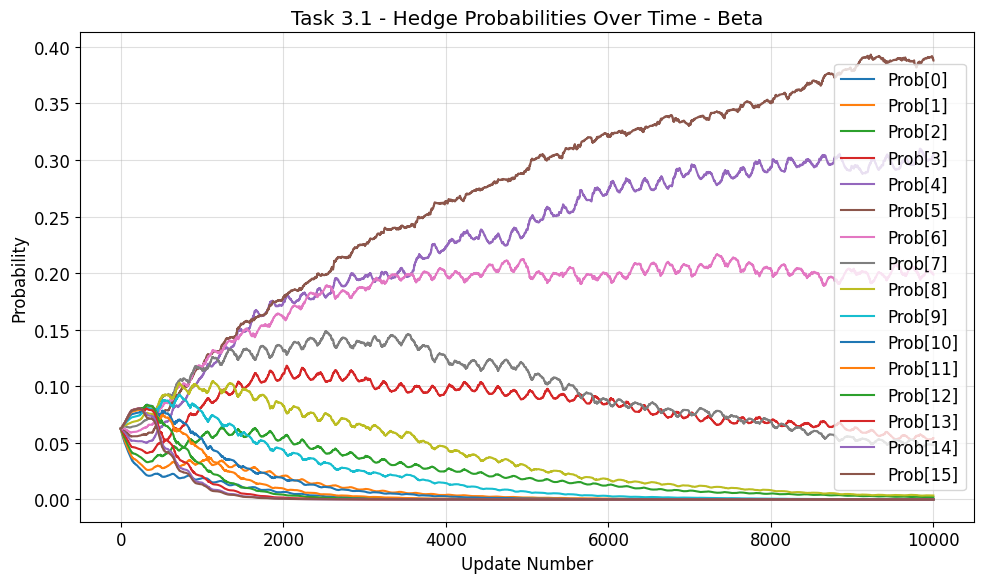


Plot per distribuzione Sinusoidal:


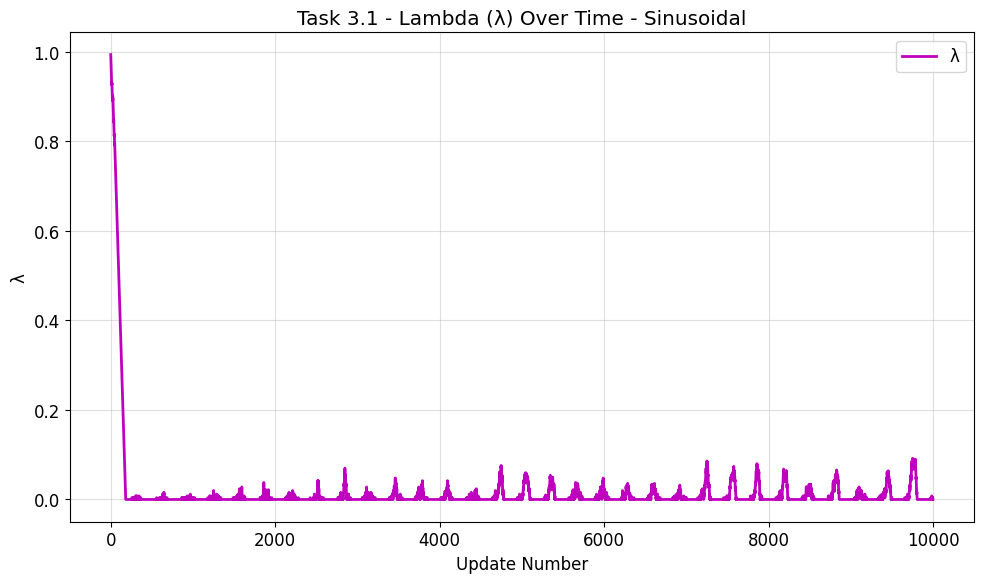

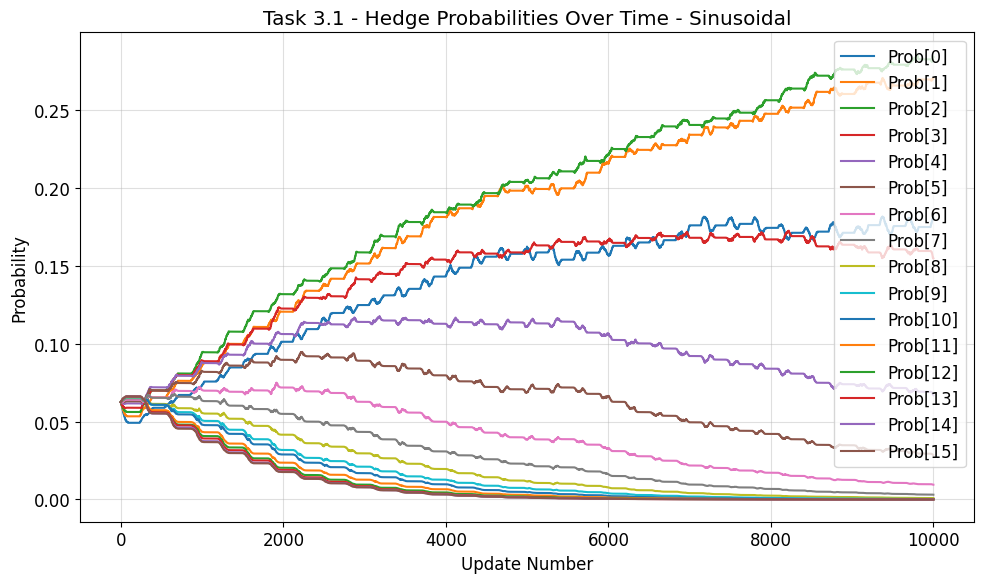


Plot per distribuzione Piecewise Beta:


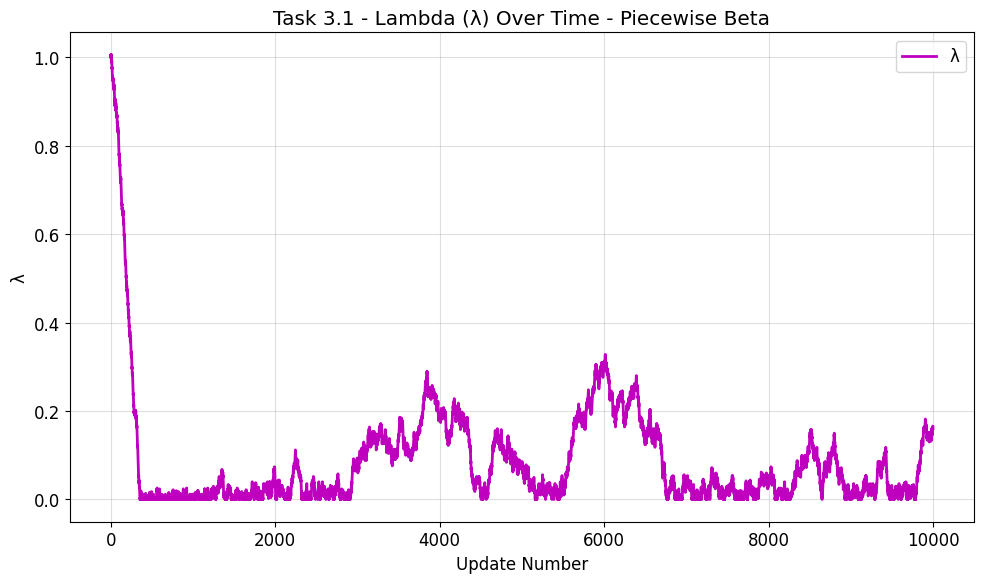

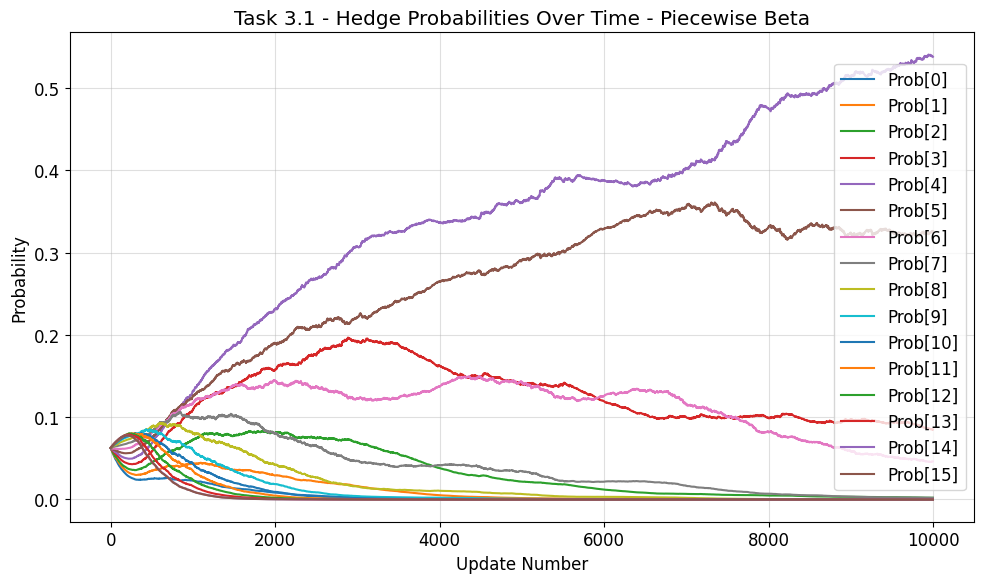


=== ANALISI DETTAGLIATA ===

--- Distribuzione Beta ---

RESULTS FOR Task 3.1 - Primal-Dual Non-Stationary Pricing (Beta)
Execution time: 0.75 seconds
Completed rounds: 10000
Average regret per round: 0.017019
Average final reward: 2374.71 ± 0.00
Efficiency vs clairvoyant: 93.3%
Average units sold: 5057.00/6000 (84.3%)

--- Distribuzione Sinusoidal ---

RESULTS FOR Task 3.1 - Primal-Dual Non-Stationary Pricing (Sinusoidal)
Execution time: 0.93 seconds
Completed rounds: 10000
Average regret per round: 0.011257
Average final reward: 572.74 ± 0.00
Efficiency vs clairvoyant: 83.6%
Average units sold: 1884.00/6000 (31.4%)

--- Distribuzione Piecewise Beta ---

RESULTS FOR Task 3.1 - Primal-Dual Non-Stationary Pricing (Piecewise Beta)
Execution time: 1.03 seconds
Completed rounds: 10000
Average regret per round: 0.018227
Average final reward: 2444.13 ± 0.00
Efficiency vs clairvoyant: 93.1%
Average units sold: 5592.00/6000 (93.2%)

=== CONFRONTO FINALE ===
Beta: Final Average Regret = 170.19

In [6]:
class Task3_1_Runner(StandardExperimentRunner):
    """Primal-Dual Non-Stationary Pricing experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.prices = config.prices
        self.shock_prob = 0.0
        self.freq = 100
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = NonStationaryBudgetedPricingEnvironment(
            self.prices, self.config.horizon, self.shock_prob, self.freq, distribution=self.distribution, rng=rng
        )
        return self.env

    def create_agent(self):
        eta = 1 / np.sqrt(self.config.horizon)
        self.agent = FFPrimalDualPricingAgent(
            self.prices, self.config.horizon, self.config.budget, eta=eta)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        """Compute clairvoyant reward - override for specific tasks"""
        sell_probabilities = self.env.compute_sell_probabilities()
        exp_util, gamma, exp_cost = compute_clairvoyant_single_product(
            self.prices, sell_probabilities, self.config.budget, self.config.horizon
        )

        return exp_util

price_grid = create_default_prices()
config = ExperimentConfig(
    task_name="Task 3.1 - Primal-Dual Non-Stationary Pricing",
    horizon=10_000,
    n_trials=1,
    seed=17,
    budget=6_000,
    prices=price_grid,
    distribution=[Distribution.BETA, Distribution.SINUSOIDAL, Distribution.PIECEWISE_BETA]
)

print(f"Task 3.1 - Primal-Dual Non-Stationary Pricing")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Shock probability: {0.50}, Frequency: {300}")
print(f"Prices: {len(price_grid)} from {price_grid[0]:.3f} to {price_grid[-2]:.3f}")

multi_runner = MultiDistributionRunner(Task3_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 3.1 - Lambda (λ) Over Time - {name}")
    
    StandardPlotter.plot_hedge_probabilities(
        result.final_agents[0], title=f"Task 3.1 - Hedge Probabilities Over Time - {name}")

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## <a id="task3_2"></a>Task 3.2: Primal-Dual Non-Stationary Pricing

Implementation of Full-Feedback Primal-Dual for non-stationary environments with adversarial shocks.


Task 3.2 - Primal-Dual Non-Stationary Pricing
Budget: 5000, Horizon: 10000
Shock probability: 0.5, Frequency: 300
Prices: 16 from 0.200 to 0.980

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 3.2 - Primal-Dual Non-Stationary Pricing (Beta)
Horizon: 10000, Trials: 1
Trial 1/1... ✓
Esperimento Beta completato

=== Eseguendo esperimento con distribuzione Sinusoidal ===
Running Task 3.2 - Primal-Dual Non-Stationary Pricing (Sinusoidal)
Horizon: 10000, Trials: 1
Trial 1/1... ✓
Esperimento Sinusoidal completato

=== Eseguendo esperimento con distribuzione Piecewise Beta ===
Running Task 3.2 - Primal-Dual Non-Stationary Pricing (Piecewise Beta)
Horizon: 10000, Trials: 1
Trial 1/1... ✓
Esperimento Piecewise Beta completato


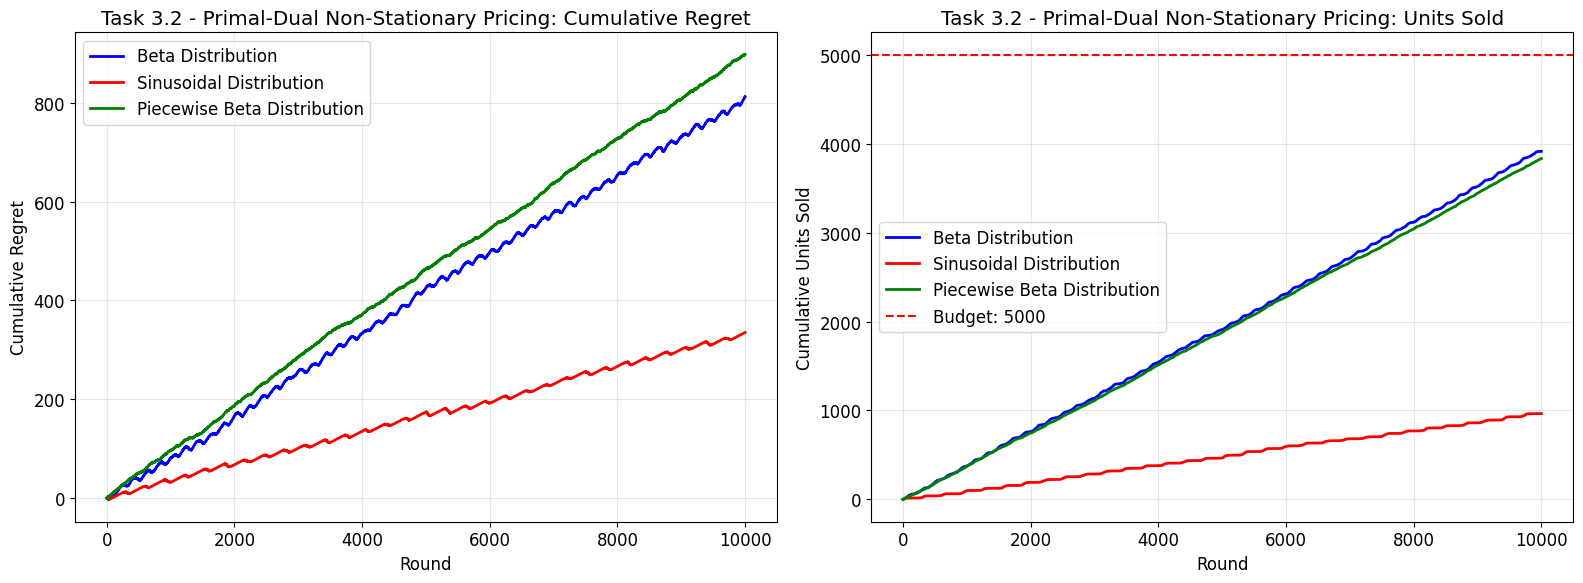


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Beta:


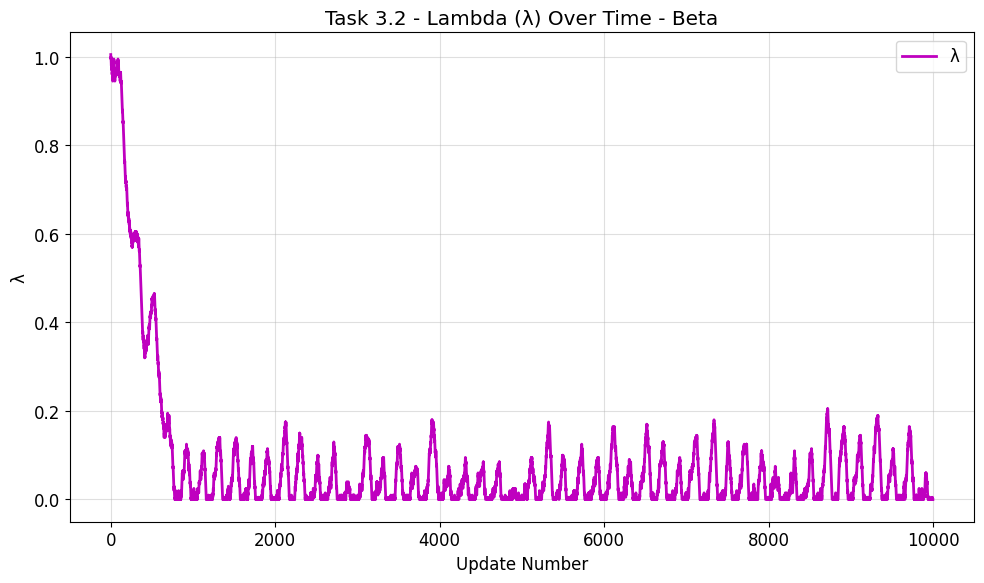

No hedge history recorded in the agent.

Plot per distribuzione Sinusoidal:


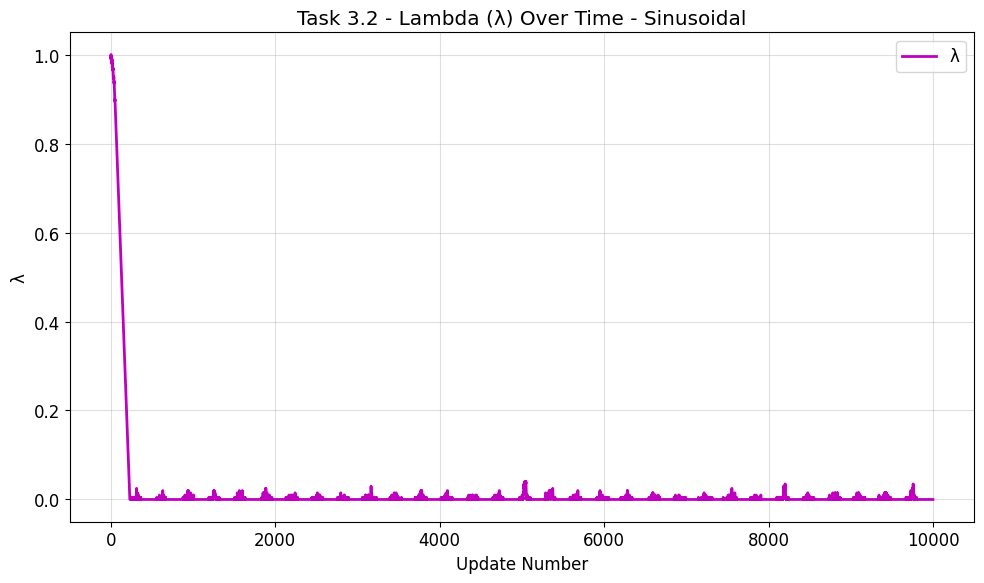

No hedge history recorded in the agent.

Plot per distribuzione Piecewise Beta:


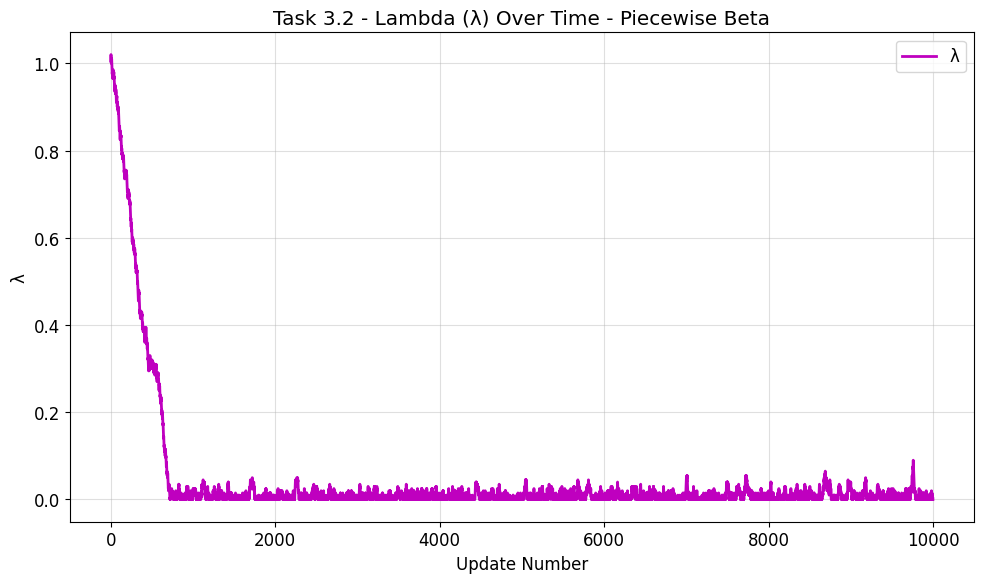

No hedge history recorded in the agent.

=== ANALISI DETTAGLIATA ===

--- Distribuzione Beta ---

RESULTS FOR Task 3.2 - Primal-Dual Non-Stationary Pricing (Beta)
Execution time: 1.45 seconds
Completed rounds: 10000
Average regret per round: 0.081235
Average final reward: 1678.26 ± 0.00
Efficiency vs clairvoyant: 67.4%
Average units sold: 3913.00/5000 (78.3%)

--- Distribuzione Sinusoidal ---

RESULTS FOR Task 3.2 - Primal-Dual Non-Stationary Pricing (Sinusoidal)
Execution time: 1.24 seconds
Completed rounds: 10000
Average regret per round: 0.033534
Average final reward: 349.97 ± 0.00
Efficiency vs clairvoyant: 51.1%
Average units sold: 965.00/5000 (19.3%)

--- Distribuzione Piecewise Beta ---

RESULTS FOR Task 3.2 - Primal-Dual Non-Stationary Pricing (Piecewise Beta)
Execution time: 1.32 seconds
Completed rounds: 10000
Average regret per round: 0.089750
Average final reward: 1581.59 ± 0.00
Efficiency vs clairvoyant: 63.8%
Average units sold: 3832.00/5000 (76.6%)

=== CONFRONTO FINALE 

In [7]:
class Task3_2_Runner(StandardExperimentRunner):
    """Primal-Dual Non-Stationary Pricing experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.prices = config.prices
        self.shock_prob = 0.0
        self.freq = 100
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = NonStationaryBudgetedPricingEnvironment(
            self.prices, self.config.horizon, self.shock_prob, self.freq,
            num_regimes=10000, rng=rng, distribution=self.distribution
        )
        return self.env

    def create_agent(self):
        self.agent = BanditFeedbackPrimalDual(
            self.prices, self.config.horizon, self.config.budget)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        """Compute clairvoyant reward - override for specific tasks"""
        sell_probabilities = self.env.compute_sell_probabilities()
        exp_util, gamma, exp_cost = compute_clairvoyant_single_product(
            self.prices, sell_probabilities, self.config.budget, self.config.horizon
        )
        return exp_util

price_grid = create_default_prices()
config = ExperimentConfig(
    task_name="Task 3.2 - Primal-Dual Non-Stationary Pricing",
    horizon=10_000,
    n_trials=1,
    seed=17,
    budget=5_000,
    prices=price_grid,
    distribution=[Distribution.BETA, Distribution.SINUSOIDAL, Distribution.PIECEWISE_BETA]
)

print(f"Task 3.2 - Primal-Dual Non-Stationary Pricing")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Shock probability: {0.50}, Frequency: {300}")
print(f"Prices: {len(price_grid)} from {price_grid[0]:.3f} to {price_grid[-2]:.3f}")

multi_runner = MultiDistributionRunner(Task3_2_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 3.2 - Lambda (λ) Over Time - {name}")
    
    if hasattr(result.final_agents[0], 'hedge_weight_history'):
        StandardPlotter.plot_hedge_probabilities(
            result.final_agents[0], title=f"Task 3.2 - Hedge Probabilities Over Time - {name}")
    else:
        print(f"Hedge probabilities non disponibili per {name} (Bandit Feedback)")

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## Task 4.1: Multi-Product Primal-Dual

Implementazione di Multi-Product Full-Feedback Primal-Dual per ambienti correlati multi-prodotto.


Task 4.1 - Multi-Product Primal-Dual
Products: 4, Budget: 8000, Horizon: 10000
Prices: 16 from 0.200 to 0.980
Correlation parameters: μ₀=0.5, ρ₀=0.6

=== Eseguendo esperimento con distribuzione Simple TV ===
Running Task 4.1 - Multi-Product Primal-Dual (Simple TV)
Horizon: 10000, Trials: 1
Trial 1/1... Expected utility: 0.4831
Optimal distribution (gamma): [[ 0.          0.          0.          0.          0.          0.
   0.         -0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.         -0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.   

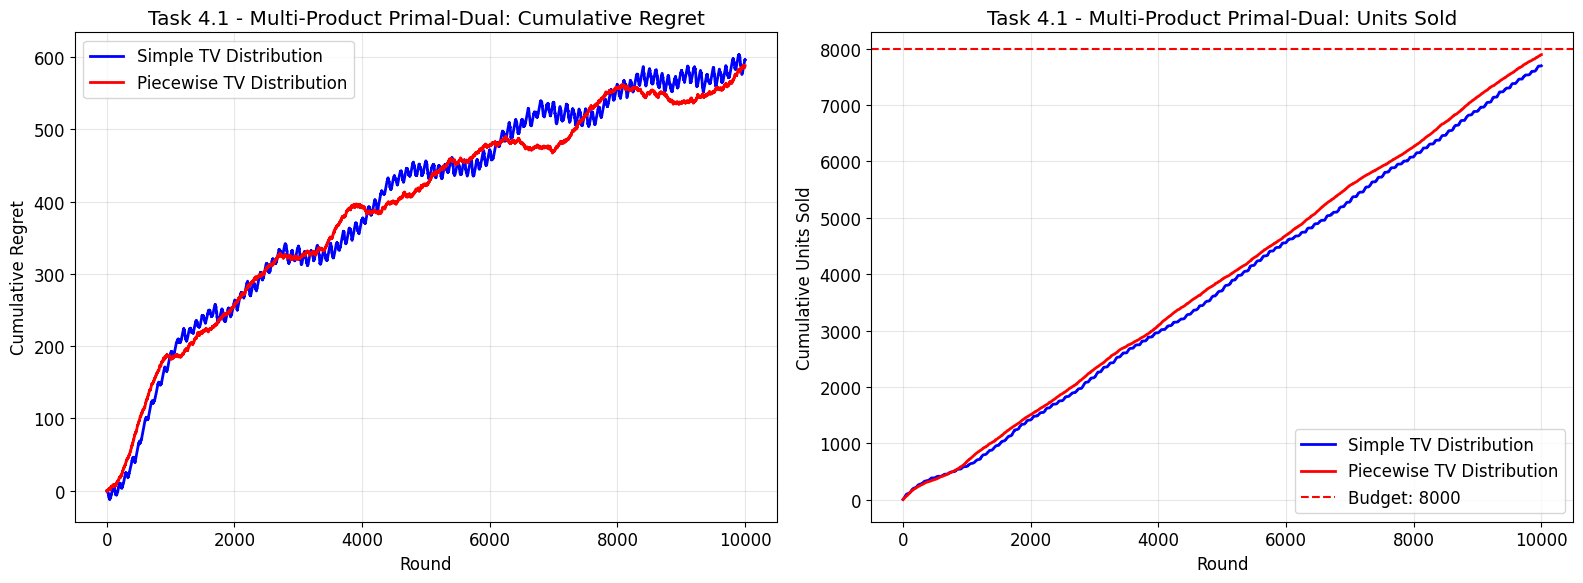


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Simple TV:


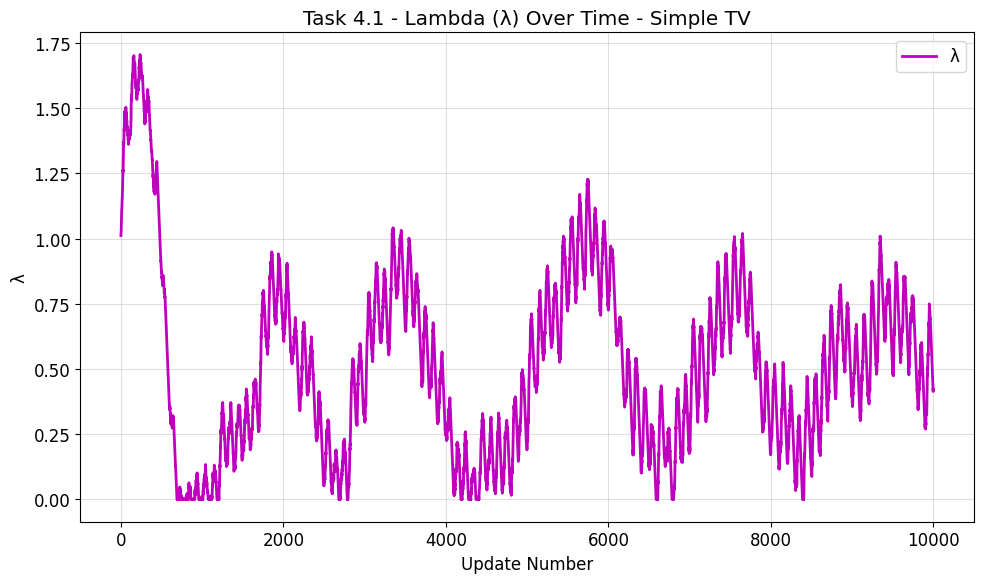

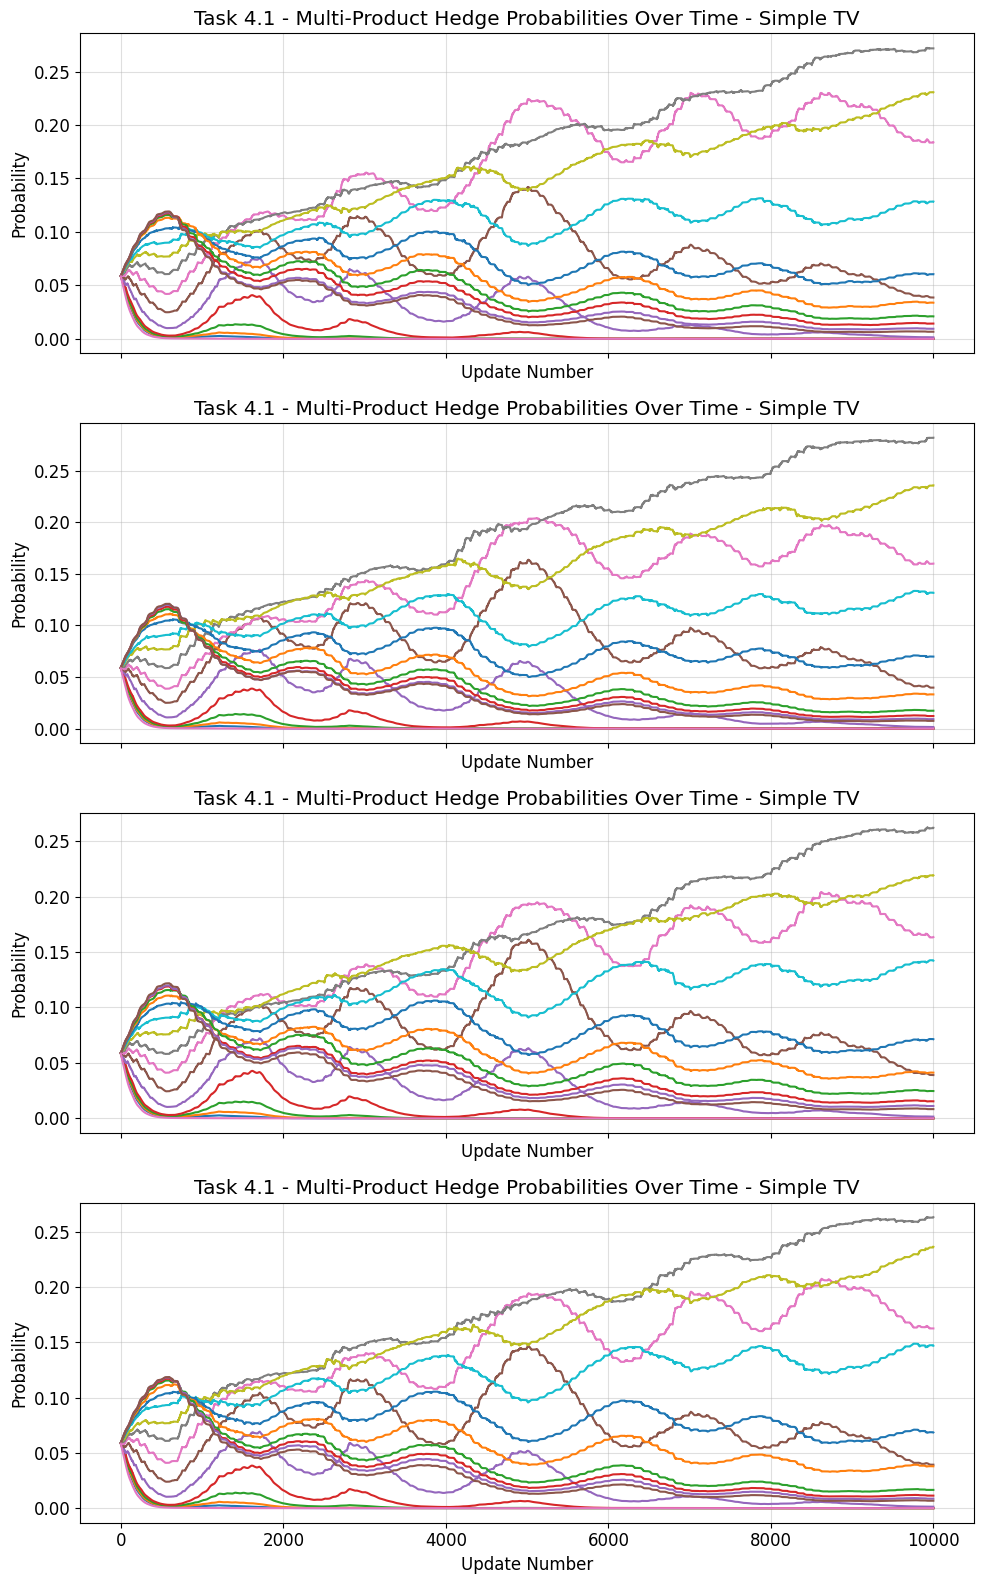


Plot per distribuzione Piecewise TV:


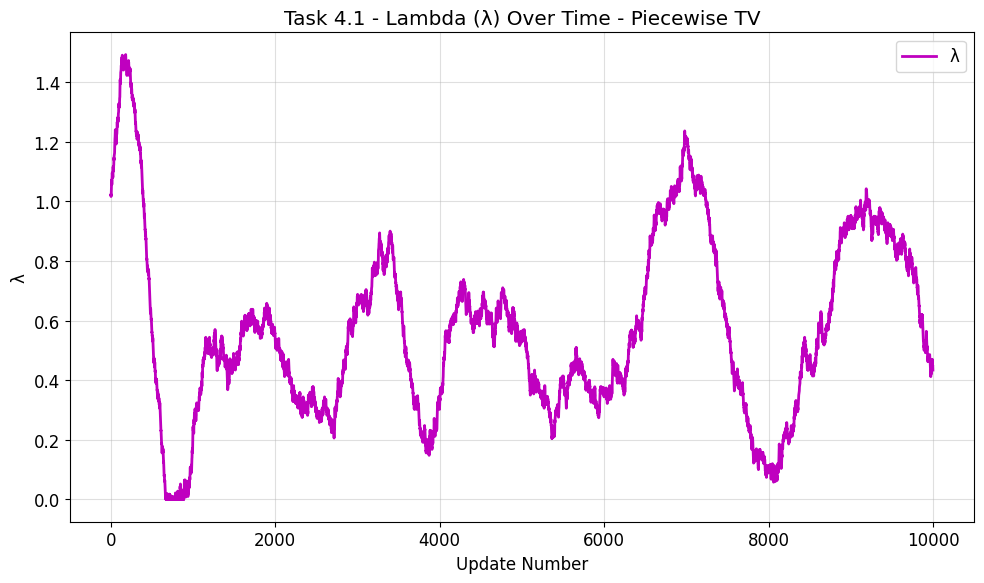

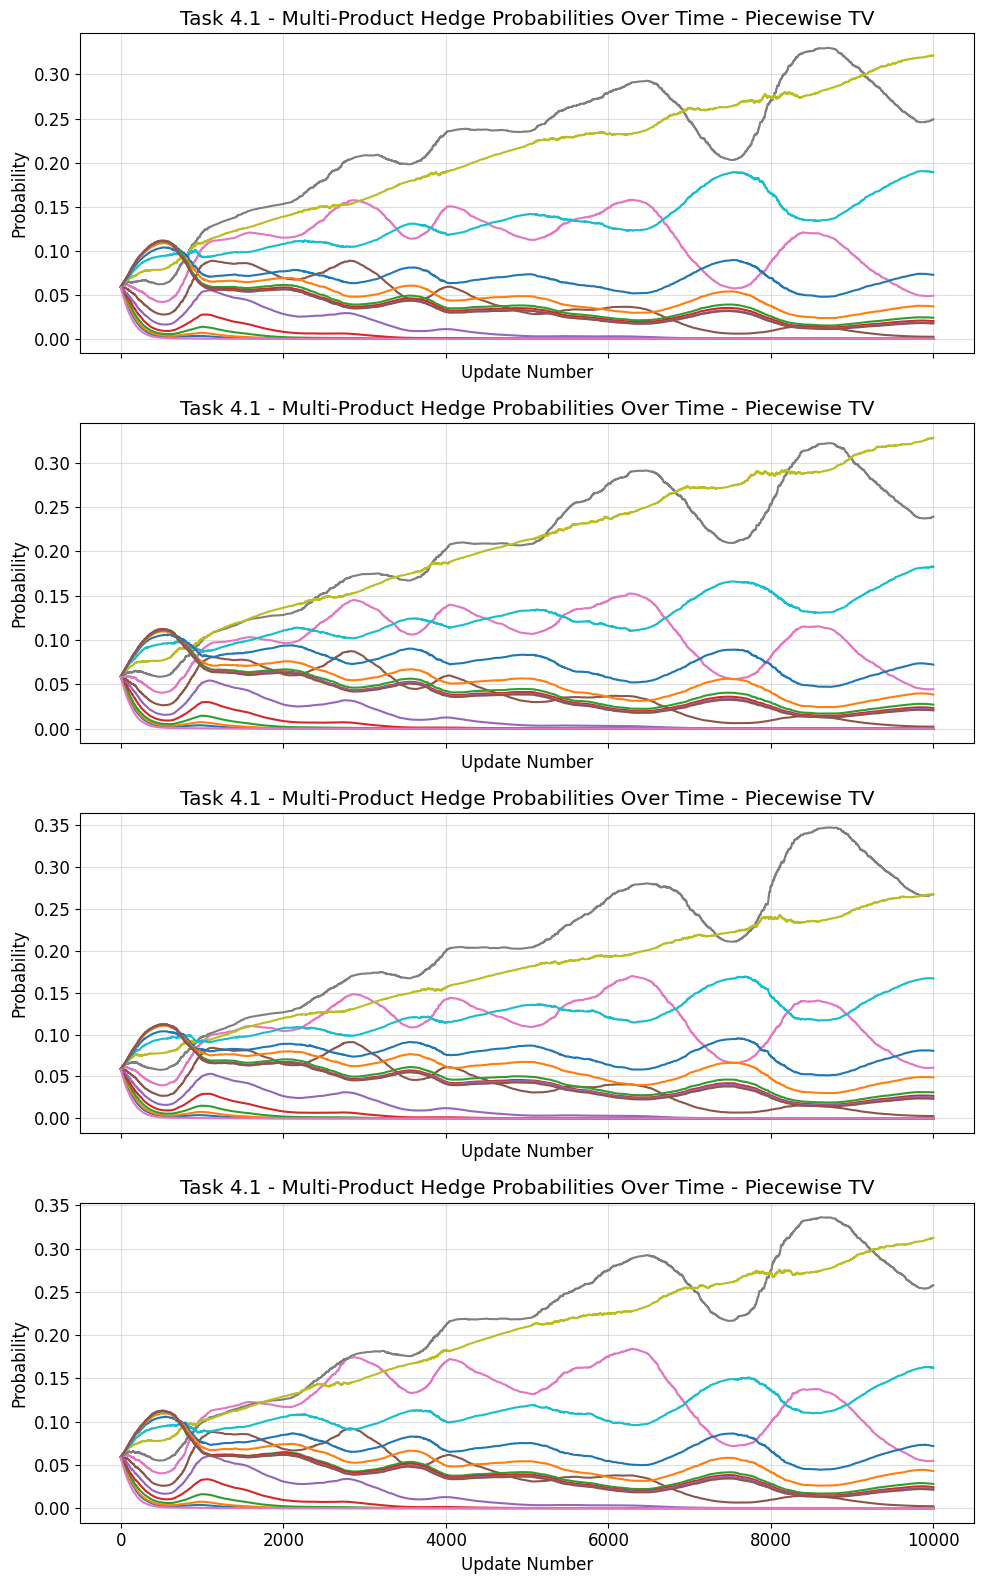


=== ANALISI DETTAGLIATA ===

--- Distribuzione Simple TV ---

RESULTS FOR Task 4.1 - Multi-Product Primal-Dual (Simple TV)
Execution time: 5.58 seconds
Completed rounds: 10000
Average regret per round: 0.059641
Average final reward: 4234.38 ± 0.00
Efficiency vs clairvoyant: 87.7%
Average units sold: 7696.00/8000 (96.2%)

--- Distribuzione Piecewise TV ---

RESULTS FOR Task 4.1 - Multi-Product Primal-Dual (Piecewise TV)
Execution time: 4.66 seconds
Completed rounds: 10000
Average regret per round: 0.058812
Average final reward: 4483.29 ± 0.00
Efficiency vs clairvoyant: 88.4%
Average units sold: 7896.00/8000 (98.7%)

=== CONFRONTO FINALE ===
Simple TV: Final Average Regret = 596.4094, Final Average Reward = 4234.3780
Piecewise TV: Final Average Regret = 588.1201, Final Average Reward = 4483.2920


In [8]:
class Task4_1_Runner(StandardExperimentRunner):
    """Multi-Product Primal-Dual experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.n_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.n_products)
        ]
        self.distribution = config.distribution
        
        self.phi = 0.0
        self.mu0, self.A, self.f = 0.5, 0.1, 100
        self.sigma0, self.A_sigma, self.phi_sigma, self.rho0 = 0.1, 0.1, 0, 0.6

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        valuation_params = {
            'mu0': self.mu0, 'A': self.A, 'f': self.f, 'phi': self.phi,
            'sigma0': self.sigma0, 'A_sigma': self.A_sigma, 'phi_sigma': self.phi_sigma, 'rho0': self.rho0,
            'num_regimes': 10000
        }
        self.env = MultiProductBudgetedPricingEnvironment(self.config.horizon, self.n_products, valuation_params, distribution=self.distribution, rng=rng)
        return self.env

    def create_agent(self) -> MultiProductFFPrimalDualPricingAgent:
        eta = 1 / np.sqrt(self.config.horizon)
        self.agent = MultiProductFFPrimalDualPricingAgent(self.price_grid, self.config.horizon, self.config.budget, self.n_products, eta)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        exp_util, gamma, exp_cost = compute_extended_clairvoyant(
            self.env.valuations, self.price_grid[0], self.config.budget)
        return exp_util

prices = create_default_prices()
config = ExperimentConfig(
    task_name="Task 4.1 - Multi-Product Primal-Dual",
    horizon=10_000,
    n_trials=1,
    seed=42,
    budget=8_000,
    prices=prices,
    n_products=4,
    distribution=[Distribution.SIMPLE_TV, Distribution.PIECEWISE_TV]
)

print(f"Task 4.1 - Multi-Product Primal-Dual")
print(f"Products: 4, Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices: {len(prices)} from {prices[0]:.3f} to {prices[-2]:.3f}")
print(f"Correlation parameters: μ₀=0.5, ρ₀=0.6")

multi_runner = MultiDistributionRunner(Task4_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 4.1 - Lambda (λ) Over Time - {name}")
    
    StandardPlotter.plot_multi_hedge_probabilities(
        result.final_agents[0], 
        title=f"Task 4.1 - Multi-Product Hedge Probabilities Over Time - {name}")

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## Task 4.2: Multi-Product Primal-Dual

Implementazione di Multi-Product Full-Feedback Primal-Dual per ambienti correlati multi-prodotto.

Task 4.2 - Multi-Product Primal-Dual
Products: 3, Budget: 12000, Horizon: 10000
Prices: 16 from 0.200 to 0.980
Correlation parameters: μ₀=0.5, ρ₀=0.6

=== Eseguendo esperimento con distribuzione Piecewise TV ===
Running Task 4.2 - Multi-Product Primal-Dual (Piecewise TV)
Horizon: 10000, Trials: 1
Trial 1/1... Expected utility: 0.6492
Optimal distribution (gamma): [[ 0.          0.          0.          0.          0.          0.
   1.         -0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.         -0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.42248062  0.57751938  0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
Expected cost: 1.2000
✓
Expected utility: 0.6492

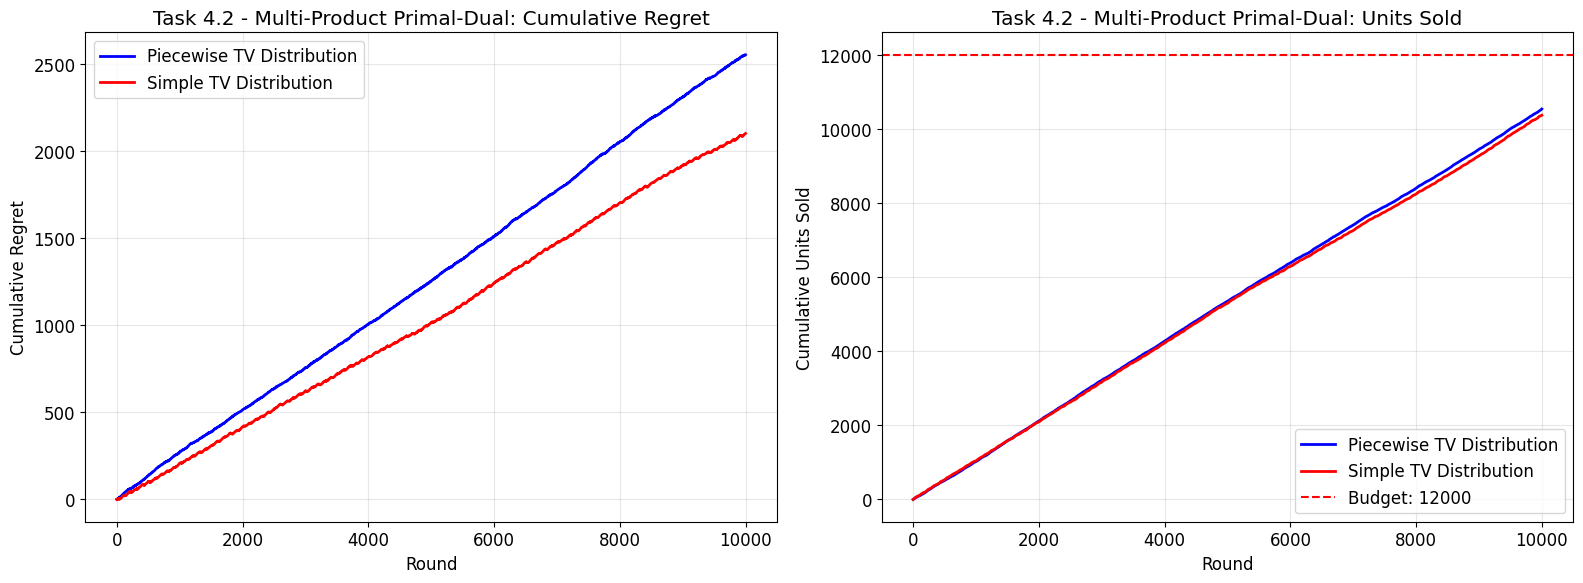


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Piecewise TV:


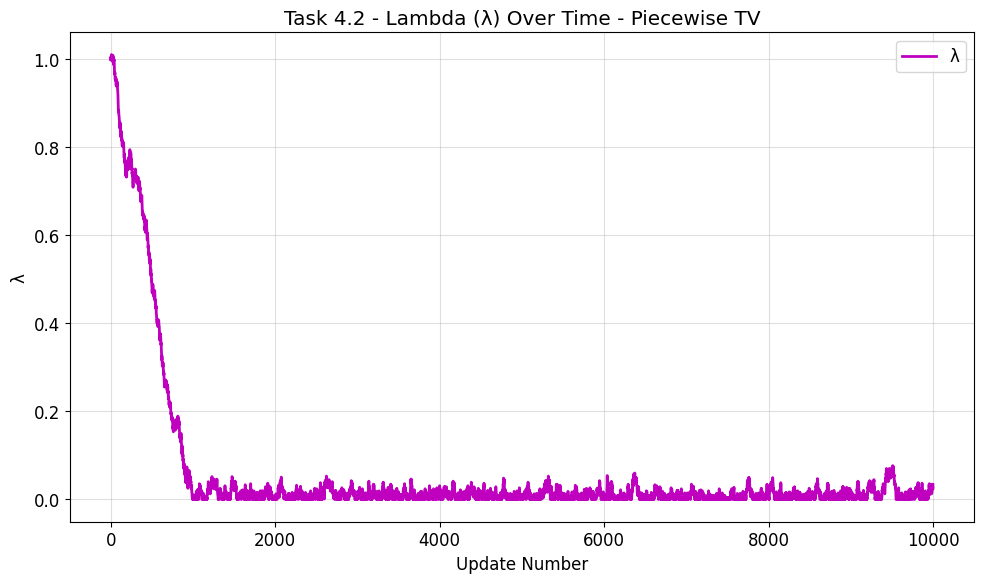

Multi-hedge probabilities non disponibili per Piecewise TV (EXP3.P Bandit Feedback)

Plot per distribuzione Simple TV:


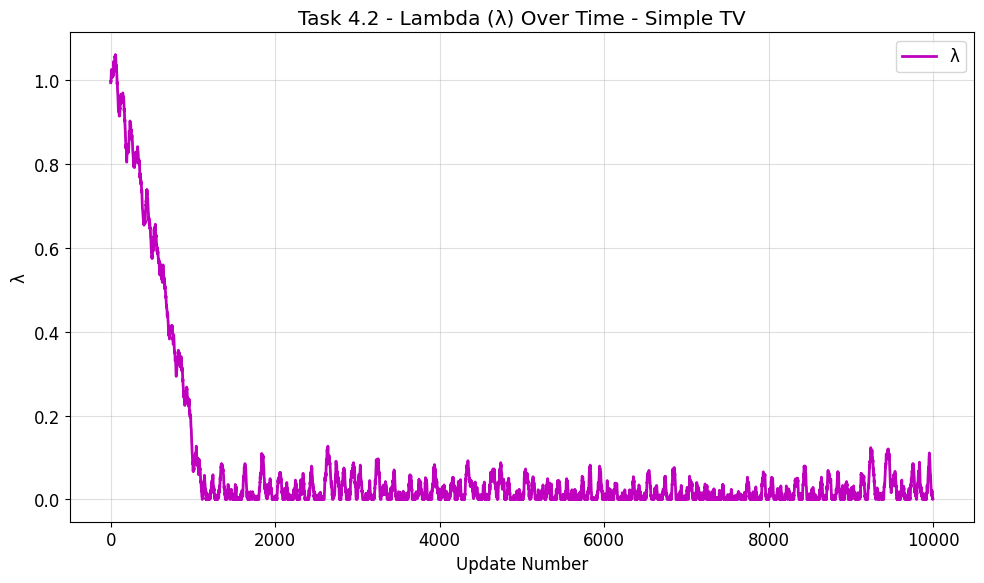

Multi-hedge probabilities non disponibili per Simple TV (EXP3.P Bandit Feedback)

=== ANALISI DETTAGLIATA ===

--- Distribuzione Piecewise TV ---

RESULTS FOR Task 4.2 - Multi-Product Primal-Dual (Piecewise TV)
Execution time: 5.47 seconds
Completed rounds: 10000
Average regret per round: 0.255411
Average final reward: 3938.10 ± 0.00
Efficiency vs clairvoyant: 60.7%
Average units sold: 10530.00/12000 (87.8%)

--- Distribuzione Simple TV ---

RESULTS FOR Task 4.2 - Multi-Product Primal-Dual (Simple TV)
Execution time: 4.69 seconds
Completed rounds: 10000
Average regret per round: 0.210147
Average final reward: 3789.23 ± 0.00
Efficiency vs clairvoyant: 64.3%
Average units sold: 10365.00/12000 (86.4%)

=== CONFRONTO FINALE ===
Piecewise TV: Final Average Regret = 2554.1097, Final Average Reward = 3938.1050
Simple TV: Final Average Regret = 2101.4675, Final Average Reward = 3789.2320


In [9]:
class Task4_2_Runner(StandardExperimentRunner):
    """Multi-Product Primal-Dual experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.n_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.n_products)
        ]
        self.distribution = config.distribution

        self.phi = 0.0
        self.mu0, self.A, self.f = 0.5, 0.1, 100
        self.sigma0, self.A_sigma, self.phi_sigma, self.rho0 = 0.1, 0.1, 0, 0.6

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        valuation_params = {
            'mu0': self.mu0, 'A': self.A, 'f': self.f, 'phi': self.phi,
            'sigma0': self.sigma0, 'A_sigma': self.A_sigma, 'phi_sigma': self.phi_sigma, 'rho0': self.rho0,
            'num_regimes': 10000
        }
        self.env = MultiProductBudgetedPricingEnvironment(
            self.config.horizon, self.n_products, valuation_params, distribution=self.distribution, rng=rng
        )
        return self.env

    def create_agent(self) -> MultiProductPDExp3PricingAgent:
        eta = 1 / np.sqrt(self.config.horizon)
        self.agent = MultiProductPDExp3PricingAgent(
            self.price_grid, self.config.horizon, self.config.budget, self.n_products, eta)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        exp_util, gamma, exp_cost = compute_extended_clairvoyant(
            self.env.valuations, self.price_grid[0], self.config.budget)
        return exp_util

prices = create_default_prices()
config = ExperimentConfig(
    task_name="Task 4.2 - Multi-Product Primal-Dual",
    horizon=10_000,
    n_trials=1,
    seed=42,
    budget=12_000,
    prices=prices,
    n_products=3,
    distribution=[Distribution.PIECEWISE_TV, Distribution.SIMPLE_TV]
)

print(f"Task 4.2 - Multi-Product Primal-Dual")
print(f"Products: {config.n_products}, Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices: {len(prices)} from {prices[0]:.3f} to {prices[-2]:.3f}")
print(f"Correlation parameters: μ₀=0.5, ρ₀=0.6")

multi_runner = MultiDistributionRunner(Task4_2_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 4.2 - Lambda (λ) Over Time - {name}")
    
    if hasattr(result.final_agents[0], 'hedge_prob_history'):
        StandardPlotter.plot_multi_hedge_probabilities(
            result.final_agents[0], 
            title=f"Task 4.2 - Multi-Product Hedge Probabilities Over Time - {name}")
    else:
        print(f"Multi-hedge probabilities non disponibili per {name} (EXP3.P Bandit Feedback)")

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## Task 5.1: Sliding Window per Non-Stazionarietà

Implementazione di Constrained Combinatorial UCB con Sliding Window per adattamento locale a cambiamenti.


Task 5.1 - Smooth Multi-Product Pricing
Products: 3, Temporal windows: 4
Budget: 14000, Horizon: 10000
Prices per product: 16

=== Eseguendo esperimento con distribuzione Smooth ===
Running Task 5.1 - Smooth Multi-Product Pricing (Smooth)
Horizon: 10000, Trials: 1
Trial 1/1... Expected utility: 0.7394
Optimal distribution (gamma): [[ 0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    1.   -0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.45  0.55  0.    0.    0.    0.
   0.    0.    0.    0.  ]]
Expected cost: 1.4000
Trial 1: Agent stopped at round 7820. ✓
Expected utility: 0.7394
Optimal distribution (gamma): [[ 0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    1.   -0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.45  0.55  0. 

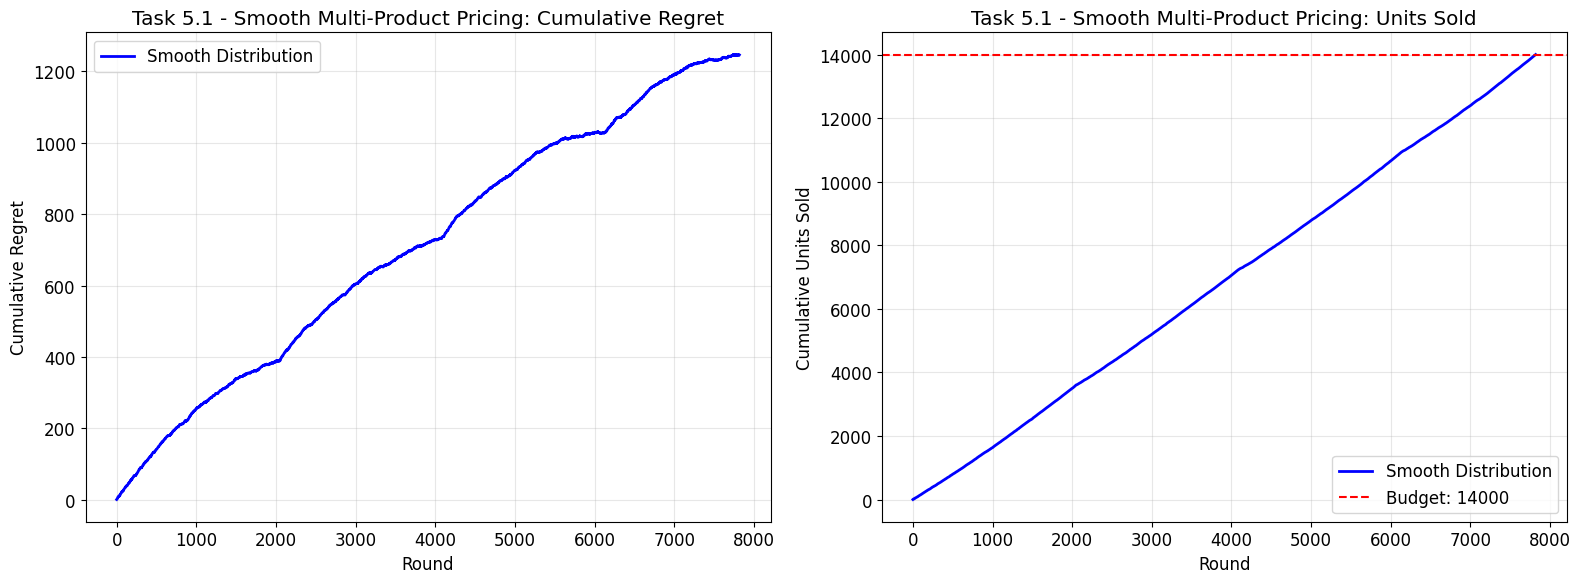


=== ANALISI DETTAGLIATA ===

--- Distribuzione Smooth ---

RESULTS FOR Task 5.1 - Smooth Multi-Product Pricing (Smooth)
Execution time: 40.62 seconds
Completed rounds: 7820
Average regret per round: 0.159322
Average final reward: 4536.43 ± 0.00
Efficiency vs clairvoyant: 78.5%
Average units sold: 14000.00/14000 (100.0%)

=== CONFRONTO FINALE ===
Smooth: Final Average Regret = 1245.9001, Final Average Reward = 4536.4286


In [10]:
class Task5_1_Runner(StandardExperimentRunner):
    """Smooth Multi-Product Pricing with Sliding Window UCB"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.N_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.N_products)
        ]
        self.num_windows = config.n_windows
        self.window_size = int(
            (config.horizon * np.log(config.horizon)) ** (2/3))
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = SmoothMultiProductPricingEnvironment(
            self.price_grid, self.config.horizon, rng=rng, 
            distribution=self.distribution, n_products=self.N_products, 
            num_windows=self.num_windows
        )
        return self.env

    def create_agent(self):
        self.agent = SlidingWindowConstrainedCombinatorialUCBAgent(
            self.price_grid, self.config.budget, self.config.horizon,
            window_size=self.window_size
        )
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        full_prices = self.price_grid[0]
        self.clairvoyant_reward, self.simplex, self.expected_cost = compute_extended_clairvoyant(
            self.env.valuations, full_prices, self.config.budget
        )
        return self.clairvoyant_reward

    def extract_metrics(self, result) -> Tuple[float, float]:
        rewards, costs, _ = result
        return float(np.sum(rewards)), float(np.sum(costs))

    def run_single_trial(self, trial: int) -> Tuple[List[float], List[int], float, Any]:
        """Run a single trial and return regrets, units sold, final reward, and final agent"""
        trial_seed = self.config.seed + trial
        np.random.seed(trial_seed)

        self.env = self.create_environment(trial_seed)
        self.agent = self.create_agent()

        regrets = []
        units_sold = []
        cum_reward = 0.0
        cum_regret = 0.0
        cum_units = 0.0

        clairvoyant_reward = self.compute_clairvoyant_reward()

        for t in range(self.config.horizon):
            action = self.agent.pull_arm()

            if action is None:
                print(f"Trial {trial+1}: Agent stopped at round {t}.", end=" ")
                break

            rewards, costs, _ = self.env.round(action)

            self.agent.update(rewards, costs)

            reward, cost = float(np.sum(rewards)), float(np.sum(costs))

            cum_reward += reward
            cum_units += cost

            instant_regret = clairvoyant_reward - reward
            cum_regret += instant_regret

            regrets.append(cum_regret)
            units_sold.append(int(cum_units))

        return regrets, units_sold, cum_reward, self.agent


base_prices = np.linspace(0, 1, 15)

config = ExperimentConfig(
    task_name="Task 5.1 - Smooth Multi-Product Pricing",
    horizon=10_000,
    n_trials=1,
    seed=18,
    budget=14_000,
    prices=base_prices,
    n_products=3,
    n_windows=4,
    distribution=[Distribution.SMOOTH]
)

print(f"Task 5.1 - Smooth Multi-Product Pricing")
print(f"Products: {config.n_products}, Temporal windows: 4")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices per product: {len(base_prices) + 1}")

multi_runner = MultiDistributionRunner(Task5_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True)

multi_runner.print_analysis()

# 5.2 Comparison with Primal Dual Hedge

Task 5.2 - Smooth Multi-Product Pricing
Products: 3, Temporal windows: 4
Budget: 8000, Horizon: 10000
Prices per product: 16

=== Eseguendo esperimento con distribuzione Smooth ===
Running Task 5.2 - Smooth Multi-Product Pricing (Smooth)
Horizon: 10000, Trials: 1
Trial 1/1... Expected utility: 0.5069
Optimal distribution (gamma): [[ 0.          0.          0.          0.          0.          0.
   0.          0.          1.         -0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.43582888  0.56417112  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.        ]]
Expected cost: 0.8000
Trial 1/1...
Trial 1: Final reward = 4585.21
Trial 1: Budget used = 7851.0/8000 (98.1%)
Trial 1:

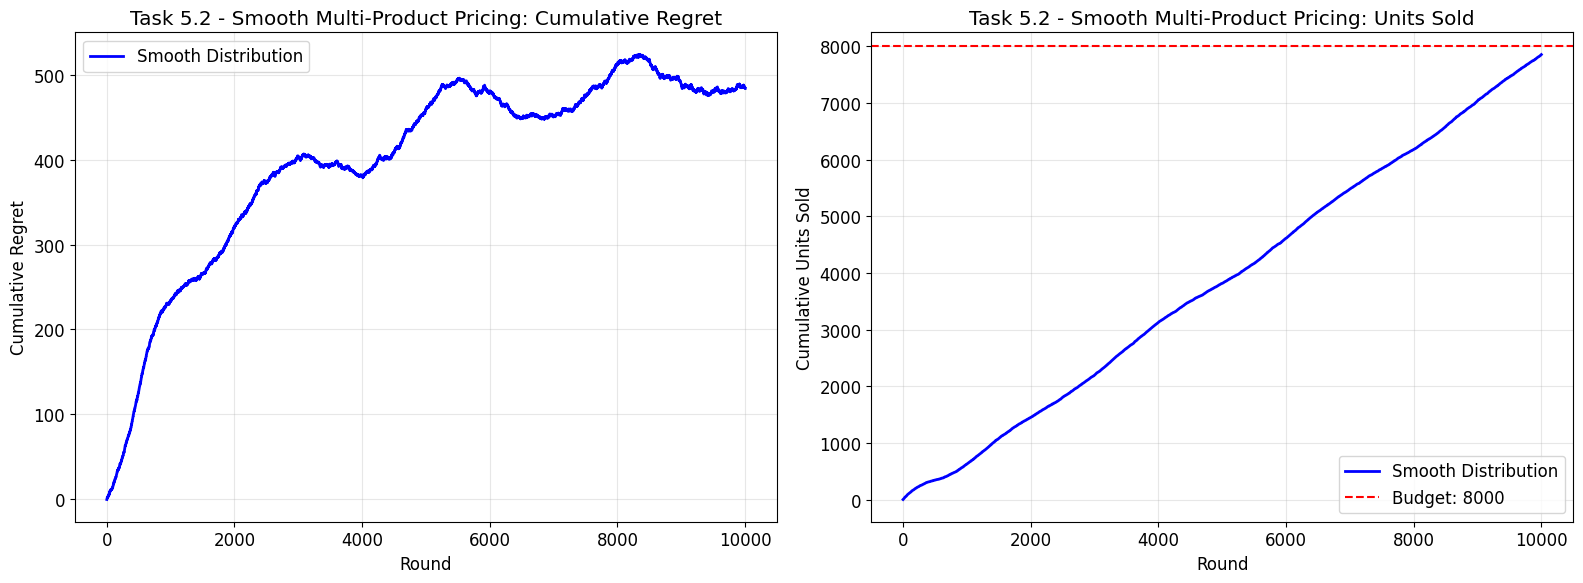


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Smooth:


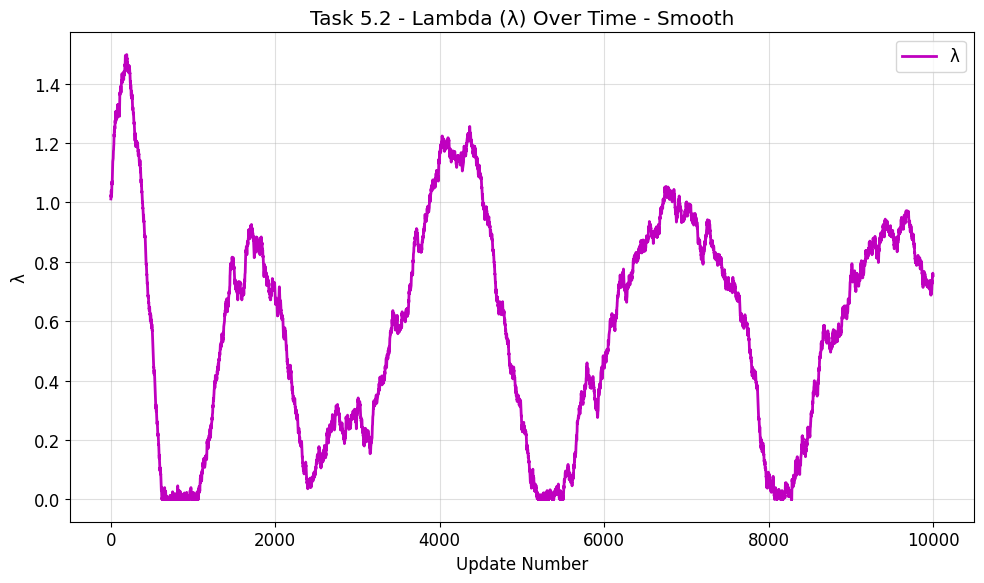

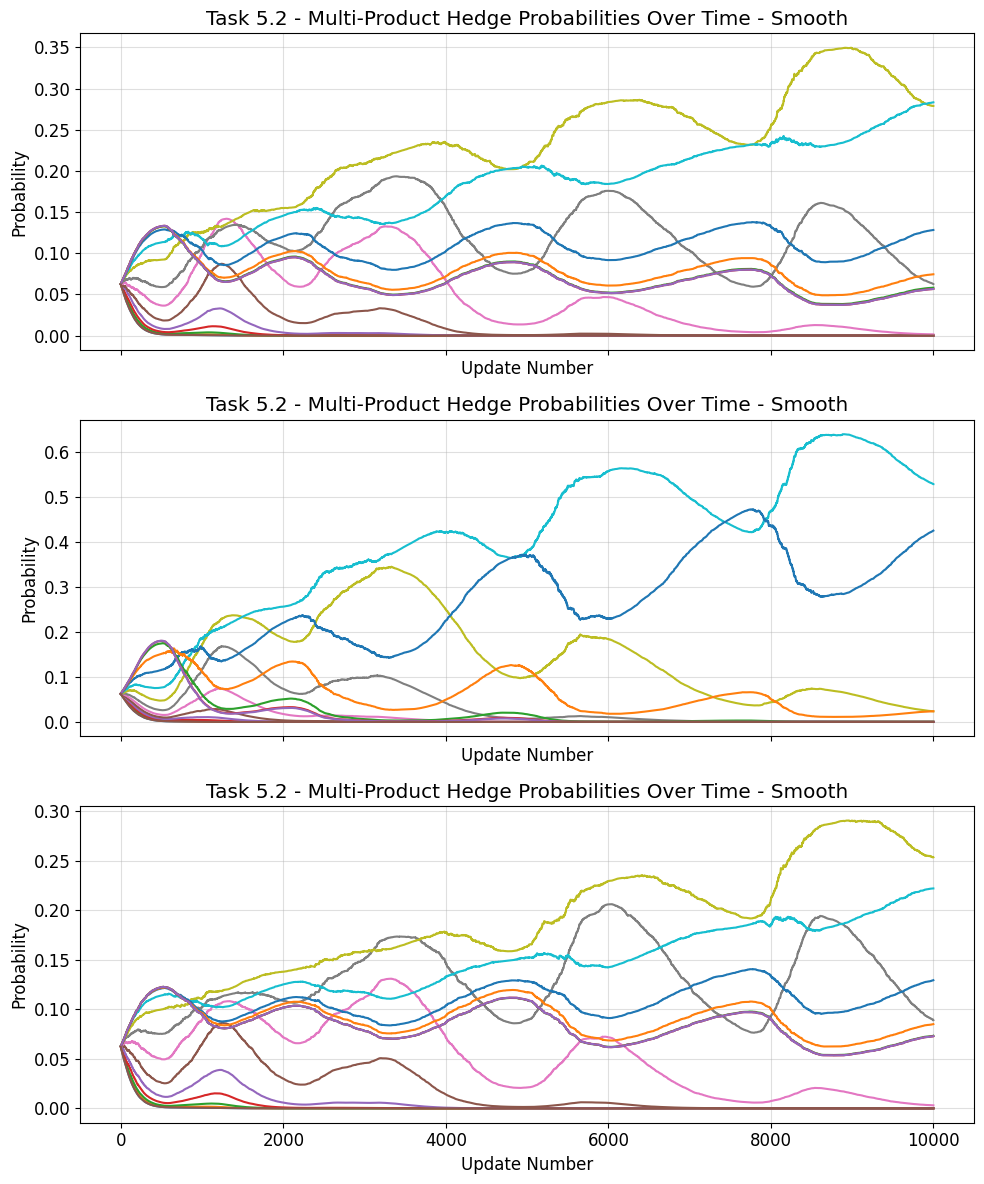

In [11]:
class Task5_2_Runner(StandardExperimentRunner):
    """Smooth Multi-Product Pricing with Sliding Window UCB"""
    
    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.N_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.N_products)
        ]
        self.num_windows = config.n_windows
        self.distribution = config.distribution
        
    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = SmoothMultiProductPricingEnvironment(
            self.price_grid, self.config.horizon, n_products=self.N_products, num_windows=self.num_windows, rng=rng, distribution=self.distribution
        )
        return self.env
        
    def create_agent(self):
        self.agent = MultiProductFFPrimalDualPricingAgent(
            self.price_grid, self.config.horizon, self.config.budget, 
            n_products = self.N_products, eta = 1 / np.sqrt(self.config.horizon)
        )
        return self.agent
        
    def compute_clairvoyant_reward(self) -> float:
        self.clair_reward, self.simplex, self.expected_cost = compute_extended_clairvoyant(
            self.env.valuations, self.price_grid[0], self.config.budget
        )
        return self.clair_reward
        
    def extract_metrics(self, result) -> Tuple[float, float]:
        rewards, costs = result
        return float(np.sum(rewards)), float(np.sum(costs))
    
    def run_single_trial(self, trial: int):
        """Custom trial runner for Task 5.2 with smooth valuation data"""
        trial_seed = self.config.seed + trial
        np.random.seed(trial_seed)
        
        env = self.create_environment(trial_seed)
        agent = self.create_agent()
        
        regrets = []
        units_sold = []
        cum_reward = 0.0
        cum_regret = 0.0
        cum_units = 0

        self.compute_clairvoyant_reward()

        
        print(f"Trial {trial+1}/{self.config.n_trials}...")
        
        for t in range(self.config.horizon):
            choice = agent.pull_arm()
            if choice is None or np.any([c is None for c in choice]):
                print(f"Trial {trial+1}: Budget exhausted at round {t}.")
                break
                
            rewards, costs, val = env.round(choice)
            
            agent.update(val)

            actual_rew = rewards.sum()
            actual_units = costs.sum()
            cum_reward += actual_rew
            
            instant_regret = self.clair_reward - actual_rew
            cum_regret += instant_regret
            cum_units += actual_units
            regrets.append(cum_regret)
            units_sold.append(int(cum_units))

        print(f"Trial {trial+1}: Final reward = {cum_reward:.2f}")
        print(f"Trial {trial+1}: Budget used = {cum_units}/{self.config.budget} ({100*cum_units/self.config.budget:.1f}%)")
        if regrets is not None and len(regrets) > 0:
            regret_per_round = cum_regret / float(len(regrets))
            print(f"Trial {trial+1}: Final regret per round = {regret_per_round:.4f}")
        else:
            print(f"Trial {trial+1}: No regret data collected")
        
        return regrets, units_sold, cum_reward, agent


base_prices = np.linspace(0, 1, 15)
config = ExperimentConfig(
    task_name="Task 5.2 - Smooth Multi-Product Pricing",
    horizon=10_000,
    n_trials=1,
    seed=18,
    budget=8_000,
    prices=base_prices,
    n_products=3,
    n_windows=4,
    distribution=[Distribution.SMOOTH]
)

print(f"Task 5.2 - Smooth Multi-Product Pricing")
print(f"Products: {config.n_products}, Temporal windows: 4")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices per product: {len(base_prices) + 1}")

multi_runner = MultiDistributionRunner(Task5_2_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 5.2 - Lambda (λ) Over Time - {name}")
    
    StandardPlotter.plot_multi_hedge_probabilities(
        result.final_agents[0], 
        title=f"Task 5.2 - Multi-Product Hedge Probabilities Over Time - {name}")

# 5.3 Comparison with Primal Dual ExP3.P

Task 5.3 - Smooth Multi-Product Pricing
Products: 3, Temporal windows: 4
Budget: 7000, Horizon: 10000
Prices per product: 16

=== Eseguendo esperimento con distribuzione Smooth ===
Running Task 5.3 - Smooth Multi-Product Pricing (Smooth)
Horizon: 10000, Trials: 1
Trial 1/1... Trial 1/1...
Expected utility: 0.4574
Optimal distribution (gamma): [[0.         0.         0.         0.         0.         0.
  0.         0.         0.80848861 0.19151139 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]]
Expected cost: 0.7000
Trial 1: Budget exhausted at round 5856.
Trial 1: Final reward = 1927.86
Trial 1: Budget used = 7000.0/7000 (100.0%)
Trial 1: Final

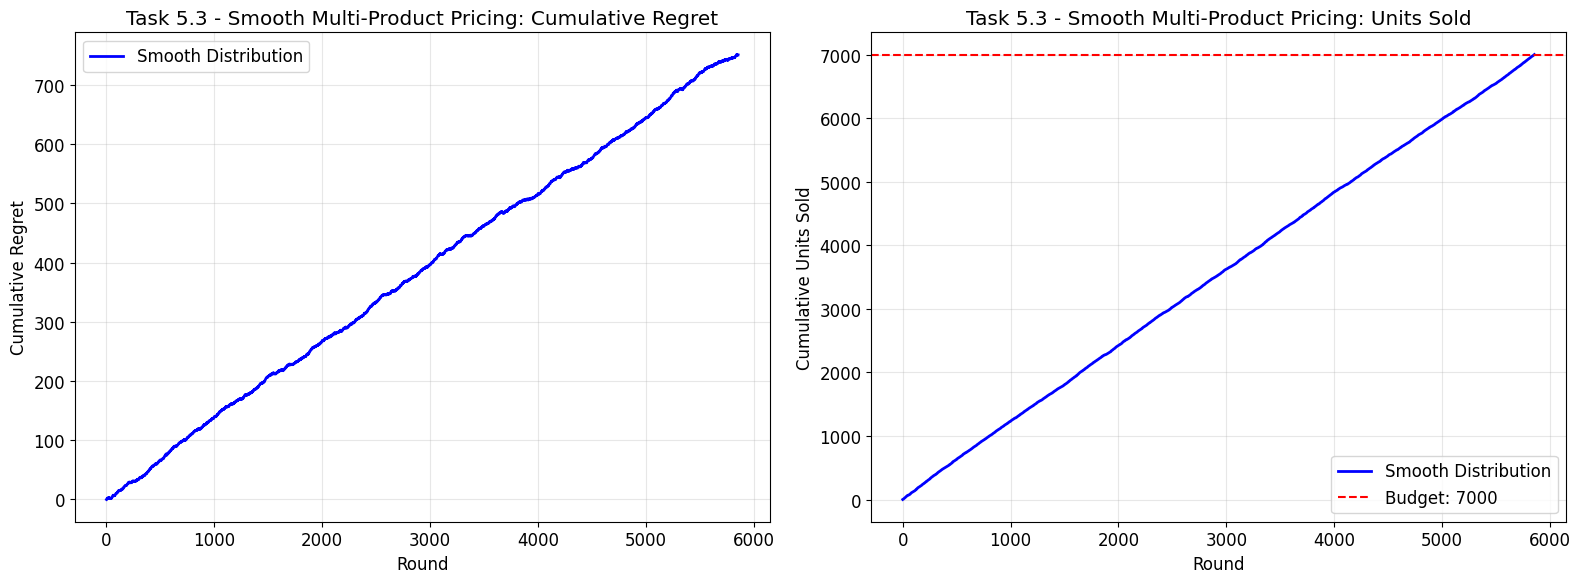


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Smooth:


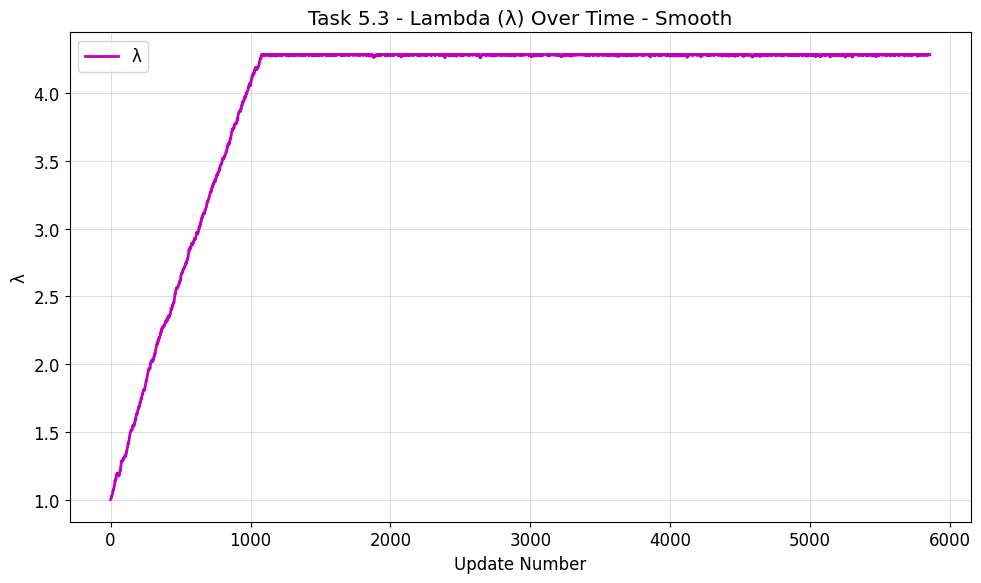

No hedge probability history recorded in the agent.

=== ANALISI DETTAGLIATA ===

--- Distribuzione Smooth ---

RESULTS FOR Task 5.3 - Smooth Multi-Product Pricing (Smooth)
Execution time: 1.71 seconds
Completed rounds: 5856
Average regret per round: 0.128220
Average final reward: 1927.86 ± 0.00
Efficiency vs clairvoyant: 72.0%
Average units sold: 7000.00/7000 (100.0%)

=== CONFRONTO FINALE ===
Smooth: Final Average Regret = 750.8552, Final Average Reward = 1927.8571


In [12]:
class Task5_3_Runner(StandardExperimentRunner):
    """Smooth Multi-Product Pricing with Sliding Window UCB"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.n_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.n_products)
        ]
        self.num_windows = config.n_windows
        self.window_size = int(
            (config.horizon * np.log(config.horizon)) ** (2/3))
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = SmoothMultiProductPricingEnvironment(
            self.price_grid, self.config.horizon, n_products=self.n_products, num_windows=self.num_windows, rng=rng, distribution=self.distribution
        )
        return self.env

    def create_agent(self):
        self.agent = MultiProductPDExp3PricingAgent(
            self.price_grid, self.config.horizon, self.config.budget,
            n_products=self.n_products
        )
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        full_prices = self.price_grid[0]
        self.clair_reward, self.simplex, self.expected_cost = compute_extended_clairvoyant(
            self.env.valuations, full_prices, self.config.budget
        )
        return self.clair_reward

    def extract_metrics(self, result) -> Tuple[float, float]:
        rewards, costs, _ = result
        return float(np.sum(rewards)), float(np.sum(costs))

    def run_single_trial(self, trial: int):
        """Custom trial runner for Task 5.3 with smooth valuation data"""
        trial_seed = self.config.seed + trial
        np.random.seed(trial_seed)

        env = self.create_environment(trial_seed)
        agent = self.create_agent()

        regrets = []
        units_sold = []
        cum_reward = 0.0
        cum_regret = 0.0
        cum_units = 0

        print(f"Trial {trial+1}/{self.config.n_trials}...")
        self.compute_clairvoyant_reward()

        for t in range(self.config.horizon):
            choice = agent.pull_arm()
            if choice is None:
                print(f"Trial {trial+1}: Budget exhausted at round {t}.")
                break

            rewards, costs, val = env.round(choice)
            agent.update(val)

            reward, cost = float(np.sum(rewards)), float(np.sum(costs))
            cum_reward += reward

            # Compute instantaneous regret
            instant_regret = self.clair_reward - reward
            cum_regret += instant_regret
            cum_units += cost
            regrets.append(cum_regret)
            units_sold.append(int(cum_units))

        print(f"Trial {trial+1}: Final reward = {cum_reward:.2f}")
        print(
            f"Trial {trial+1}: Budget used = {cum_units}/{self.config.budget} ({100*cum_units/self.config.budget:.1f}%)")
        if len(regrets) > 0:
            regret_per_round = cum_regret / float(len(regrets))
            print(
                f"Trial {trial+1}: Final regret per round = {regret_per_round:.4f}")
        else:
            print(f"Trial {trial+1}: No regret data collected")

        return regrets, units_sold, cum_reward, agent


base_prices = np.linspace(0, 1, 15)

config = ExperimentConfig(
    task_name="Task 5.3 - Smooth Multi-Product Pricing",
    horizon=10_000,
    n_trials=1,
    seed=18,
    budget=7_000,
    prices=base_prices,
    n_products=3,
    n_windows=4,
    distribution=[Distribution.SMOOTH]
)

print(f"Task 5.3 - Smooth Multi-Product Pricing")
print(f"Products: {config.n_products}, Temporal windows: 4")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices per product: {len(base_prices) + 1}")

multi_runner = MultiDistributionRunner(Task5_3_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 5.3 - Lambda (λ) Over Time - {name}")
    
    StandardPlotter.plot_multi_hedge_probabilities(
        result.final_agents[0], 
        title=f"Task 5.3 - Multi-Product Hedge Probabilities Over Time - {name}")

multi_runner.print_analysis()